Introduction
============

This is interactive notebook regarding "Introduction to path planning". (Author: Björn Hein)

License is based on Creative Commons: Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) (pls. check: http://creativecommons.org/licenses/by-nc/4.0/)

This notebook imports all discussed algorithms and does a comparison

**Attention**: This worksheet has external dependencies 

* to the files "InnoKonz2dEnv.py" or "InnoKonzShapelyEnv.py". These files contain simple 2D environments based on numpy arrays or the shapely library with an interface for the use as collision checking in the algorithms.
* to all modules like "**Algorithm**.py", which contains the corresponding algorithms 

Important links are:

* General Info: http://www.python.org
* Python tutorial http://www.python.org/doc/tut/
* NetworkX http://networkx.github.io/
* NumPy and SciPy Guide http://docs.scipy.org/
* Matplotlib gallery http://matplotlib.sourceforge.net/gallery.html


Remember that:

* you have to press ctrl-return or shift-return, to execute the code in the code sections, only then the variables are "generated" and can be used
* you can execute the whole notebook by Cell->runAll

Adding all planners
===========


In [1]:
import sys
import HelperClass
sys.path.append("templates")
%load_ext autoreload
%autoreload 2

In [2]:
from IPPerfMonitor import IPPerfMonitor

from BasicPRM import IPVISBasicPRM 
from BasicPRM import IPBasicPRM_Roundtrip

from VisibilityPRM import IPVisibilityPRM_Roundtrip
from VisibilityPRM import IPVISVisibilityPRM
from VisibilityPRM import Optimized_IPVisibilityPRM_Roundtrip
from VisibilityPRM import Grid_IPVisibilityPRM_Roundtrip
from VisibilityPRM import CC_IPVisibilityPRM_Roundtrip

from LazyPRM import IPLazyPRM_Roundtrip
from LazyPRM import IPVISLazyPRM


Set-up of the test scenario and the configuration for all planner
===================================

Following a procedure to compare all discussed planners are shown:

1. Configuration for every planner is defined
2. The configuration and the planner is stored in the variable setup, a Python dict()
3. the variable setup is then used to uniformly call the planning calls


In [3]:
plannerFactory = dict()

basicConfig = dict()
basicConfig["radius"] = 3
basicConfig["numNodes"] = 200
plannerFactory["basePRM"] = [IPBasicPRM_Roundtrip.BasicPRM, basicConfig, IPVISBasicPRM.basicPRMVisualize]


#visbilityConfig = dict()
# visbilityConfig["ntry"] = 300
# plannerFactory["visibilityPRM"] = [IPVisibilityPRM_Roundtrip.VisPRM, visbilityConfig, IPVISVisibilityPRM.visibilityPRMVisualize ]


visbilityConfig = dict()
visbilityConfig["ntry"] = 300
plannerFactory["visibilityPRM"] = [CC_IPVisibilityPRM_Roundtrip.VisPRM, visbilityConfig, IPVISVisibilityPRM.visibilityPRMVisualize ]


# visbilityConfig = dict()
# visbilityConfig["ntry"] = 300
# plannerFactory["visibilityPRM"] = [Grid_IPVisibilityPRM_Roundtrip.VisPRM, visbilityConfig, IPVISVisibilityPRM.visibilityPRMVisualize ]


lazyConfig = dict()
lazyConfig["initialRoadmapSize"] = 10
lazyConfig["updateRoadmapSize"]  = 5
lazyConfig["kNearest"] = 8
plannerFactory["lazyPRM"] = [IPLazyPRM_Roundtrip.LazyPRM, lazyConfig, IPVISLazyPRM.lazyPRMVisualize]

In [4]:
class ResultCollection (object):
    
    def __init__(self, plannerFactoryName, planner, benchmark, solution, perfDataFrame):
        self.plannerFactoryName = plannerFactoryName
        self.planner = planner
        self.benchmark = benchmark
        self.solution = solution
        self.perfDataFrame = perfDataFrame

In [5]:
import IPTestSuite
import importlib

In [6]:
importlib.reload(IPTestSuite)

<module 'IPTestSuite' from '/home/maurice/Dokumente/Projekt_Roboterprogrammierung/stand_13.1/RKIM23RobotProgramDS/02_eigeneNotebooks/IPTestSuite.py'>

In [7]:
fullBenchList = IPTestSuite.benchList

for benchmark in fullBenchList:
    print(benchmark.name)

Trap
Bottleneck
Fat bottleneck
B_rush
circle od death


In [8]:
resultList = list()
testList = fullBenchList[:]

for key,producer in list(plannerFactory.items()):
    HelperClass.HelperClass.printInColor(str(key)+" "+ str(producer), 'yellow')

    for benchmark in testList:
        HelperClass.HelperClass.printInColor("Planning: " + key + " - " + benchmark.name, 'yellow')
        planner = producer[0](benchmark.collisionChecker)
        IPPerfMonitor.clearData()
        

        try:
            resultList.append(ResultCollection(key,
                                        planner, 
                                        benchmark, 
                                        planner.planRoundPath(benchmark.startList,benchmark.interimGoalList,benchmark.goalList,producer[1]),
                                        IPPerfMonitor.dataFrame()),)



        except Exception as e:
            HelperClass.HelperClass.printInColor("PLANNING ERROR ! PLANNING ERROR ! PLANNING ERROR", 'red')
            HelperClass.HelperClass.printInColor(e, 'red')
            import traceback
            HelperClass.HelperClass.printInColor(traceback.print_exc(), 'red')

            pass

        

Fehler No path between start and interim2.


Fehler No path between interim1 and interim2.


Erstes Ziel Interim:[[3, 9], 8.48528137423857, 'interim0']
try-Pfad nach Löschung von Start:  [0, 'interim0']
While beginnt


Aktueller Node (step):  0
Path im Check and CollisonUpdate [9, 15]
step [8.234878004342074, 19.52468298321218]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[3, 9], 11.754696917294826, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [8.234878004342074, 19.52468298321218]
step [3, 9]
******* Check Edges for Collision
Collison zwischen interim0   0

Kollision erkannt
MaxTry: 1
TRYPATH-Umplanung nach Kollision: [5, 'interim0']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [8.234878004342074, 19.52468298321218]
step [2.8310776003481575, 11.758505672169811]
******* Check Edges for Collision
Collison zwischen 5   0

Kollision erkannt
MaxTry: 2
TRYPATH-Umplanung nach Kollision: [8, 'interim0']

While beginnt


Aktueller Node (step):  8
Path im Check and CollisonUpdate [8.234878004342074, 19.52468298321218]
step [8.95078776977478, 12.822266043963461]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[3, 9], 7.072594488003479, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [8.95078776977478, 12.822266043963461]
step [3, 9]
******* Check Edges for Collision
Collison zwischen interim0   8

Kollision erkannt
MaxTry: 3
TRYPATH-Umplanung nach Kollision: [1, 'interim0']

While beginnt


Aktueller Node (step):  1
Path im Check and CollisonUpdate [8.95078776977478, 12.822266043963461]
step [6.8303035643689105, 2.377845578395009]
******* Check Edges for Collision
Collison zwischen 1   8

Kollision erkannt
MaxTry: 4
TRYPATH-Umplanung nach Kollision: [5, 'interim0']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [8.95078776977478, 12.822266043963461]
step [2.8310776003481575, 11.758505672169811]
******* Check Edges for Collision
Collison zwischen 5   8

Kollision erkannt
MaxTry: 5
TRYPATH-Umplanung nach Kollision: [9, 'interim0']

While beginnt


Aktueller Node (step):  9
Path im Check and CollisonUpdate [8.95078776977478, 12.822266043963461]
step [5.227505195528213, 5.844550996699491]
******* Check Edges for Collision
Collison zwischen 9   8

Kollision erkannt
MaxTry: 6
TRYPATH-Umplanung nach Kollision: [14, 'interim0']

While beginnt


Aktueller Node (step):  14
Path im Check and CollisonUpdate [8.95078776977478, 12.822266043963461]
step [5.530411300932409, 16.986221997632217]
Removed nodeNumber mit Koordinaten: [5.530411300932409, 16.986221997632217]
Remove Nodenumer:  14

Kollision erkannt
MaxTry: 7
TRYPATH-Umplanung nach Kollision: [23, 'interim0']

While beginnt


Aktueller Node (step):  23
Path im Check and CollisonUpdate [8.95078776977478, 12.822266043963461]
step [2.578443258298057, 11.491087389131776]
******* Check Edges for Collision
Collison zwischen 23   8

Kollision erkannt
MaxTry: 8
TRYPATH-Umplanung nach Kollision: [29, 'interim0']

While beginnt


Aktueller Node (step):  29
Path im Check and CollisonUpdate [8.95078776977478, 12.822266043963461]
step [5.1796657820687955, 8.87114153590114]
Removed nodeNumber mit Koordinaten: [5.1796657820687955, 8.87114153590114]
Remove Nodenumer:  29

Kollision erkannt
MaxTry: 9
TRYPATH-Umplanung nach Kollision: [34, 'interim0']

While beginnt


Aktueller Node (step):  34
Path im Check and CollisonUpdate [8.95078776977478, 12.822266043963461]
step [1.0173036358136154, 13.981449923386087]
******* Check Edges for Collision
Collison zwischen 34   8

Kollision erkannt
MaxTry: 10
TRYPATH-Umplanung nach Kollision: [56, 'interim0']

While beginnt


Aktueller Node (step):  56
Path im Check and CollisonUpdate [8.95078776977478, 12.822266043963461]
step [8.327727295099216, 9.231678966189238]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[3, 9], 5.332762255559469, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [8.327727295099216, 9.231678966189238]
step [3, 9]
******* Check Edges for Collision
Collison zwischen interim0   56

Kollision erkannt
MaxTry: 11
TRYPATH-Umplanung nach Kollision: [9, 'interim0']

While beginnt


Aktueller Node (step):  9
Path im Check and CollisonUpdate [8.327727295099216, 9.231678966189238]
step [5.227505195528213, 5.844550996699491]
******* Check Edges for Collision
Collison zwischen 9   56

Kollision erkannt
MaxTry: 12
TRYPATH-Umplanung nach Kollision: [24, 23, 'interim0']

While beginnt


Aktueller Node (step):  24
Path im Check and CollisonUpdate [8.327727295099216, 9.231678966189238]
step [9.903865108097529, 11.890608361498204]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[3, 9], 7.484582161374798, 'interim0']


Aktueller Node (step):  23
Path im Check and CollisonUpdate [9.903865108097529, 11.890608361498204]
step [2.578443258298057, 11.491087389131776]
******* Check Edges for Collision
Collison zwischen 23   24

Kollision erkannt
MaxTry: 13
TRYPATH-Umplanung nach Kollision: [6, 5, 'interim0']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [9.903865108097529, 11.890608361498204]
step [12.585701360635198, 11.858550668903177]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[19, 8], 7.4854285314503075, 'interim1']


Aktueller Node (step):  5
Path im Check and CollisonUpdate [12.585701360635198, 11.858550668903177]
step [2.8310776003481575, 11.758505672169811]
******* Check Edges for Collision
Collison zwischen 5   6

Kollision erkannt
MaxTry: 14
TRYPATH-Umplanung nach Kollision: [11, 1, 'interim0']

While beginnt


Aktueller Node (step):  11
Path im Check and CollisonUpdate [12.585701360635198, 11.858550668903177]
step [15.074789582205282, 2.062685603635088]
******* Check Edges for Collision
Collison zwischen 11   6

Kollision erkannt
MaxTry: 15
TRYPATH-Umplanung nach Kollision: ['start', 5, 'interim0']

While beginnt


Aktueller Node (step):  start
Path im Check and CollisonUpdate [12.585701360635198, 11.858550668903177]
step [9, 15]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[3, 9], 8.48528137423857, 'interim0']
Ziel gleich geblieben:  [[3, 9], 8.48528137423857, 'interim0']


Aktueller Node (step):  5
Path im Check and CollisonUpdate [9, 15]
step [2.8310776003481575, 11.758505672169811]
******* Check Edges for Collision
Collison zwischen 5   start

Kollision erkannt
MaxTry: 16
TRYPATH-Umplanung nach Kollision: [23, 'interim0']

While beginnt


Aktueller Node (step):  23
Path im Check and CollisonUpdate [9, 15]
step [2.578443258298057, 11.491087389131776]
******* Check Edges for Collision
Collison zwischen 23   start

Kollision erkannt
MaxTry: 17
TRYPATH-Umplanung nach Kollision: [34, 'interim0']

While beginnt


Aktueller Node (step):  34
Path im Check and CollisonUpdate [9, 15]
step [1.0173036358136154, 13.981449923386087]
******* Check Edges for Collision
Collison zwischen 34   start

Kollision erkannt
MaxTry: 18
TRYPATH-Umplanung nach Kollision: [44, 5, 'interim0']

While beginnt


Aktueller Node (step):  44
Path im Check and CollisonUpdate [9, 15]
step [4.057274324550819, 16.618463957541003]
******* Check Edges for Collision
Collison zwischen 44   start

Kollision erkannt
MaxTry: 19
TRYPATH-Umplanung nach Kollision: [41, 34, 'interim0']

While beginnt


Aktueller Node (step):  41
Path im Check and CollisonUpdate [9, 15]
step [5.377345243800171, 18.823041363481465]
******* Check Edges for Collision
Collison zwischen 41   start

Kollision erkannt
MaxTry: 20
TRYPATH-Umplanung nach Kollision: [0, 41, 34, 'interim0']

While beginnt


Aktueller Node (step):  0
Path im Check and CollisonUpdate [9, 15]
step [8.234878004342074, 19.52468298321218]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[3, 9], 11.754696917294826, 'interim0']


Aktueller Node (step):  41
Path im Check and CollisonUpdate [8.234878004342074, 19.52468298321218]
step [5.377345243800171, 18.823041363481465]
******* Check Edges for Collision
Collison zwischen 41   0

Kollision erkannt
MaxTry: 21
TRYPATH-Umplanung nach Kollision: [44, 5, 'interim0']

While beginnt


Aktueller Node (step):  44
Path im Check and CollisonUpdate [8.234878004342074, 19.52468298321218]
step [4.057274324550819, 16.618463957541003]
******* Check Edges for Collision
Collison zwischen 44   0

Kollision erkannt
MaxTry: 22
TRYPATH-Umplanung nach Kollision: [51, 34, 'interim0']

While beginnt


Aktueller Node (step):  51
Path im Check and CollisonUpdate [8.234878004342074, 19.52468298321218]
step [1.3855087384592595, 21.852012479004266]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[3, 9], 12.953023075486, 'interim0']


Aktueller Node (step):  34
Path im Check and CollisonUpdate [1.3855087384592595, 21.852012479004266]
step [1.0173036358136154, 13.981449923386087]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[3, 9], 5.361522937725918, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [1.0173036358136154, 13.981449923386087]
step [3, 9]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[3, 9], 0.0, 'interim0']
Interim ist erreicht!
SubPath rein:  ['start', 0, 8, 56, 24, 6, 'start', 0, 51, 34, 'interim0']
Modifizierter Pfad:  ['start', 0, 51, 34, 'interim0']
checkedInterimGoalList:  [[3, 9], [19, 8], [3, 3], [20, 15], [10, 1]]
checkedInterimGoalList:  [[19, 8], [3, 3], [20, 15], [10, 1]]
Gerade entfernt:  [3, 9]
Neues Ziel-Interim verfügbar!:  [[3, 3], 6.0, 'interim2']
Neuer TRYPATH nachdem Ziel erreicht['interim0', 1, 'interim2']
interim0  aus Trypath entfernt
While beginnt


Aktueller Node (step):  1
Path im Check and CollisonUpdate [3, 9]
step [6.8303035643689105, 2.377845578395009]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 1], 3.4562167078982635, 'interim4']


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [6.8303035643689105, 2.377845578395009]
step [3, 3]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[3, 3], 0.0, 'interim2']
Interim ist erreicht!
SubPath rein:  ['interim0', 1, 'interim2']
Modifizierter Pfad:  ['start', 0, 51, 34, 'interim0', 1, 'interim2']
checkedInterimGoalList:  [[19, 8], [3, 3], [20, 15], [10, 1]]
checkedInterimGoalList:  [[19, 8], [20, 15], [10, 1]]
Gerade entfernt:  [3, 3]
Neues Ziel-Interim verfügbar!:  [[10, 1], 7.280109889280518, 'interim4']
Neuer TRYPATH nachdem Ziel erreicht['interim2', 1, 'interim4']
interim2  aus Trypath entfernt
While beginnt


Aktueller Node (step):  1
Path im Check and CollisonUpdate [3, 3]
step [6.8303035643689105, 2.377845578395009]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 1], 3.4562167078982635, 'interim4']


Aktueller Node (step):  interim4
Path im Check and CollisonUpdate [6.8303035643689105, 2.377845578395009]
step [10, 1]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 1], 0.0, 'interim4']
Interim ist erreicht!
SubPath rein:  ['interim2', 1, 'interim4']
Modifizierter Pfad:  ['start', 0, 51, 34, 'interim0', 1, 'interim2', 1, 'interim4']
checkedInterimGoalList:  [[19, 8], [20, 15], [10, 1]]
checkedInterimGoalList:  [[19, 8], [20, 15]]
Gerade entfernt:  [10, 1]
Neues Ziel-Interim verfügbar!:  [[19, 8], 11.40175425099138, 'interim1']
Neuer TRYPATH nachdem Ziel erreicht['interim4', 2, 'interim1']
interim4  aus Trypath entfernt
While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [10, 1]
step [20.14345407542224, 4.4433842285059875]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[19, 8], 3.735907248398932, 'interim1']


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [20.14345407542224, 4.4433842285059875]
step [19, 8]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[19, 8], 0.0, 'interim1']
Interim ist erreicht!
SubPath rein:  ['interim4', 2, 'interim1']
Modifizierter Pfad:  ['start', 0, 51, 34, 'interim0', 1, 'interim2', 1, 'interim4', 2, 'interim1']
checkedInterimGoalList:  [[19, 8], [20, 15]]
checkedInterimGoalList:  [[20, 15]]
Gerade entfernt:  [19, 8]
Neues Ziel-Interim verfügbar!:  [[20, 15], 7.0710678118654755, 'interim3']
Neuer TRYPATH nachdem Ziel erreicht['interim1', 2, 'interim3']
interim1  aus Trypath entfernt
While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [19, 8]
step [20.14345407542224, 4.4433842285059875]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 15], 10.557590426736176, 'interim3']


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [20.14345407542224, 4.4433842285059875]
step [20, 15]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 15], 0.0, 'interim3']
Interim ist erreicht!
SubPath rein:  ['interim1', 2, 'interim3']
Modifizierter Pfad:  ['start', 0, 51, 34, 'interim0', 1, 'interim2', 1, 'interim4', 2, 'interim1', 2, 'interim3']


Erstes Ziel Interim:[[4, 4], 11.0, 'interim2']
try-Pfad nach Löschung von Start:  [6, 'interim2']
While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [4, 15]
step [7.491509582621111, 10.59051380606431]
******* Check Edges for Collision
Collison zwischen 6   start

Kollision erkannt
MaxTry: 1
TRYPATH-Umplanung nach Kollision: [11, 'interim2']

While beginnt


Aktueller Node (step):  11
Path im Check and CollisonUpdate [4, 15]
step [2.669239802994901, 9.910474400280027]
******* Check Edges for Collision
Collison zwischen 11   start

Kollision erkannt
MaxTry: 2
TRYPATH-Umplanung nach Kollision: [8, 1, 'interim2']

While beginnt


Aktueller Node (step):  8
Path im Check and CollisonUpdate [4, 15]
step [10.435696361409727, 13.671715868955289]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 16], 7.914518085876402, 'interim1']


Aktueller Node (step):  1
Path im Check and CollisonUpdate [10.435696361409727, 13.671715868955289]
step [10.297981997352235, 0.9136649131462313]
******* Check Edges for Collision
Collison zwischen 1   8

Kollision erkannt
MaxTry: 3
TRYPATH-Umplanung nach Kollision: [6, 'interim2']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [10.435696361409727, 13.671715868955289]
step [7.491509582621111, 10.59051380606431]
******* Check Edges for Collision
Collison zwischen 6   8

Kollision erkannt
MaxTry: 4
TRYPATH-Umplanung nach Kollision: [17, 'interim2']

While beginnt


Aktueller Node (step):  17
Path im Check and CollisonUpdate [10.435696361409727, 13.671715868955289]
step [7.669662444248106, 6.804399456153369]
******* Check Edges for Collision
Collison zwischen 17   8

Kollision erkannt
MaxTry: 5
TRYPATH-Umplanung nach Kollision: [4, 1, 'interim2']

While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [10.435696361409727, 13.671715868955289]
step [11.173880008148759, 14.039649039047458]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 16], 7.102034217972957, 'interim1']


Aktueller Node (step):  1
Path im Check and CollisonUpdate [11.173880008148759, 14.039649039047458]
step [10.297981997352235, 0.9136649131462313]
******* Check Edges for Collision
Collison zwischen 1   4

Kollision erkannt
MaxTry: 6
TRYPATH-Umplanung nach Kollision: [6, 'interim2']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [11.173880008148759, 14.039649039047458]
step [7.491509582621111, 10.59051380606431]
******* Check Edges for Collision
Collison zwischen 6   4

Kollision erkannt
MaxTry: 7
TRYPATH-Umplanung nach Kollision: [13, 1, 'interim2']

While beginnt


Aktueller Node (step):  13
Path im Check and CollisonUpdate [11.173880008148759, 14.039649039047458]
step [21.768568685796087, 4.694135976345451]
******* Check Edges for Collision
Collison zwischen 13   4

Kollision erkannt
MaxTry: 8
TRYPATH-Umplanung nach Kollision: [0, 6, 'interim2']

While beginnt


Aktueller Node (step):  0
Path im Check and CollisonUpdate [11.173880008148759, 14.039649039047458]
step [21.144568622564986, 10.00721076358398]
******* Check Edges for Collision
Collison zwischen 0   4

Kollision erkannt
MaxTry: 9
TRYPATH-Umplanung nach Kollision: [2, 6, 'interim2']

While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [11.173880008148759, 14.039649039047458]
step [10.794451149727918, 19.556675891399543]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 16], 8.035538415695619, 'interim1']


Aktueller Node (step):  6
Path im Check and CollisonUpdate [10.794451149727918, 19.556675891399543]
step [7.491509582621111, 10.59051380606431]
******* Check Edges for Collision
Collison zwischen 6   2

Kollision erkannt
MaxTry: 10
TRYPATH-Umplanung nach Kollision: [3, 6, 'interim2']

While beginnt


Aktueller Node (step):  3
Path im Check and CollisonUpdate [10.794451149727918, 19.556675891399543]
step [2.412839674706232, 17.81141441223287]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 13.902310813840284, 'interim2']


Aktueller Node (step):  6
Path im Check and CollisonUpdate [2.412839674706232, 17.81141441223287]
step [7.491509582621111, 10.59051380606431]
******* Check Edges for Collision
Collison zwischen 6   3

Kollision erkannt
MaxTry: 11
TRYPATH-Umplanung nach Kollision: [11, 'interim2']

While beginnt


Aktueller Node (step):  11
Path im Check and CollisonUpdate [2.412839674706232, 17.81141441223287]
step [2.669239802994901, 9.910474400280027]
******* Check Edges for Collision
Collison zwischen 11   3

Kollision erkannt
MaxTry: 12
TRYPATH-Umplanung nach Kollision: [5, 6, 'interim2']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [2.412839674706232, 17.81141441223287]
step [2.230835935896812, 17.53707851323326]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 13.652195287174724, 'interim2']


Aktueller Node (step):  6
Path im Check and CollisonUpdate [2.230835935896812, 17.53707851323326]
step [7.491509582621111, 10.59051380606431]
******* Check Edges for Collision
Collison zwischen 6   5

Kollision erkannt
MaxTry: 13
TRYPATH-Umplanung nach Kollision: [11, 'interim2']

While beginnt


Aktueller Node (step):  11
Path im Check and CollisonUpdate [2.230835935896812, 17.53707851323326]
step [2.669239802994901, 9.910474400280027]
******* Check Edges for Collision
Collison zwischen 11   5

Kollision erkannt
MaxTry: 14
TRYPATH-Umplanung nach Kollision: [12, 6, 'interim2']

While beginnt


Aktueller Node (step):  12
Path im Check and CollisonUpdate [2.230835935896812, 17.53707851323326]
step [6.361203900105727, 15.003368696690224]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 11.253861849746372, 'interim2']


Aktueller Node (step):  6
Path im Check and CollisonUpdate [6.361203900105727, 15.003368696690224]
step [7.491509582621111, 10.59051380606431]
******* Check Edges for Collision
Collison zwischen 6   12

Kollision erkannt
MaxTry: 15
TRYPATH-Umplanung nach Kollision: [11, 'interim2']

While beginnt


Aktueller Node (step):  11
Path im Check and CollisonUpdate [6.361203900105727, 15.003368696690224]
step [2.669239802994901, 9.910474400280027]
******* Check Edges for Collision
Collison zwischen 11   12

Kollision erkannt
MaxTry: 16
TRYPATH-Umplanung nach Kollision: [10, 6, 'interim2']

While beginnt


Aktueller Node (step):  10
Path im Check and CollisonUpdate [6.361203900105727, 15.003368696690224]
step [9.631893471950798, 14.303817262474183]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 16], 8.538281018089076, 'interim1']


Aktueller Node (step):  6
Path im Check and CollisonUpdate [9.631893471950798, 14.303817262474183]
step [7.491509582621111, 10.59051380606431]
******* Check Edges for Collision
Collison zwischen 6   10

Kollision erkannt
MaxTry: 17
TRYPATH-Umplanung nach Kollision: [11, 'interim2']

While beginnt


Aktueller Node (step):  11
Path im Check and CollisonUpdate [9.631893471950798, 14.303817262474183]
step [2.669239802994901, 9.910474400280027]
******* Check Edges for Collision
Collison zwischen 11   10

Kollision erkannt
MaxTry: 18
TRYPATH-Umplanung nach Kollision: [18, 6, 'interim2']

While beginnt


Aktueller Node (step):  18
Path im Check and CollisonUpdate [9.631893471950798, 14.303817262474183]
step [5.102472051401176, 11.655457556355673]
******* Check Edges for Collision
Collison zwischen 18   10

Kollision erkannt
MaxTry: 19
TRYPATH-Umplanung nach Kollision: [21, 6, 'interim2']

While beginnt


Aktueller Node (step):  21
Path im Check and CollisonUpdate [9.631893471950798, 14.303817262474183]
step [9.351526514044167, 10.910945820128267]
******* Check Edges for Collision
Collison zwischen 21   10

Kollision erkannt
MaxTry: 20
TRYPATH-Umplanung nach Kollision: [8, 0, 6, 'interim2']

While beginnt


Aktueller Node (step):  8
Path im Check and CollisonUpdate [9.631893471950798, 14.303817262474183]
step [10.435696361409727, 13.671715868955289]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 16], 7.914518085876402, 'interim1']


Aktueller Node (step):  0
Path im Check and CollisonUpdate [10.435696361409727, 13.671715868955289]
step [21.144568622564986, 10.00721076358398]
******* Check Edges for Collision
Collison zwischen 0   8

Kollision erkannt
MaxTry: 21
TRYPATH-Umplanung nach Kollision: [21, 6, 'interim2']

While beginnt


Aktueller Node (step):  21
Path im Check and CollisonUpdate [10.435696361409727, 13.671715868955289]
step [9.351526514044167, 10.910945820128267]
******* Check Edges for Collision
Collison zwischen 21   8

Kollision erkannt
MaxTry: 22
TRYPATH-Umplanung nach Kollision: [3, 15, 6, 'interim2']

While beginnt


Aktueller Node (step):  3
Path im Check and CollisonUpdate [10.435696361409727, 13.671715868955289]
step [2.412839674706232, 17.81141441223287]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 13.902310813840284, 'interim2']


Aktueller Node (step):  15
Path im Check and CollisonUpdate [2.412839674706232, 17.81141441223287]
step [1.6089047189585275, 14.08031312739604]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 10.36002168865354, 'interim2']


Aktueller Node (step):  6
Path im Check and CollisonUpdate [1.6089047189585275, 14.08031312739604]
step [7.491509582621111, 10.59051380606431]
******* Check Edges for Collision
Collison zwischen 6   15

Kollision erkannt
MaxTry: 23
TRYPATH-Umplanung nach Kollision: [11, 'interim2']

While beginnt


Aktueller Node (step):  11
Path im Check and CollisonUpdate [1.6089047189585275, 14.08031312739604]
step [2.669239802994901, 9.910474400280027]
******* Check Edges for Collision
Collison zwischen 11   15

Kollision erkannt
MaxTry: 24
TRYPATH-Umplanung nach Kollision: [18, 6, 'interim2']

While beginnt


Aktueller Node (step):  18
Path im Check and CollisonUpdate [1.6089047189585275, 14.08031312739604]
step [5.102472051401176, 11.655457556355673]
******* Check Edges for Collision
Collison zwischen 18   15

Kollision erkannt
MaxTry: 25
TRYPATH-Umplanung nach Kollision: [39, 6, 'interim2']

While beginnt


Aktueller Node (step):  39
Path im Check and CollisonUpdate [1.6089047189585275, 14.08031312739604]
step [3.191324646305354, 9.403468027740061]
******* Check Edges for Collision
Collison zwischen 39   15

Kollision erkannt
MaxTry: 26
TRYPATH-Umplanung nach Kollision: [48, 11, 'interim2']

While beginnt


Aktueller Node (step):  48
Path im Check and CollisonUpdate [1.6089047189585275, 14.08031312739604]
step [3.7268602488815477, 13.031922633476949]
Removed nodeNumber mit Koordinaten: [3.7268602488815477, 13.031922633476949]
Remove Nodenumer:  48

Kollision erkannt
MaxTry: 27
TRYPATH-Umplanung nach Kollision: [53, 11, 'interim2']

While beginnt


Aktueller Node (step):  53
Path im Check and CollisonUpdate [1.6089047189585275, 14.08031312739604]
step [1.7622404477543234, 12.710418446329976]
Removed nodeNumber mit Koordinaten: [1.7622404477543234, 12.710418446329976]
Remove Nodenumer:  53

Kollision erkannt
MaxTry: 28
TRYPATH-Umplanung nach Kollision: [63, 11, 'interim2']

While beginnt


Aktueller Node (step):  63
Path im Check and CollisonUpdate [1.6089047189585275, 14.08031312739604]
step [0.3129517466584737, 10.07107877303606]
******* Check Edges for Collision
Collison zwischen 63   15

Kollision erkannt
MaxTry: 29
TRYPATH-Umplanung nach Kollision: [76, 11, 'interim2']

While beginnt


Aktueller Node (step):  76
Path im Check and CollisonUpdate [1.6089047189585275, 14.08031312739604]
step [1.2530792283816368, 11.934765588233834]
******* Check Edges for Collision
Collison zwischen 76   15

Kollision erkannt
MaxTry: 30
TRYPATH-Umplanung nach Kollision: [80, 11, 'interim2']

While beginnt


Aktueller Node (step):  80
Path im Check and CollisonUpdate [1.6089047189585275, 14.08031312739604]
step [0.1467921119163056, 11.619183070703055]
******* Check Edges for Collision
Collison zwischen 80   15

Kollision erkannt
MaxTry: 31
TRYPATH-Umplanung nach Kollision: ['start', 18, 6, 'interim2']

While beginnt


Aktueller Node (step):  start
Path im Check and CollisonUpdate [1.6089047189585275, 14.08031312739604]
step [4, 15]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 11.0, 'interim2']
Ziel gleich geblieben:  [[4, 4], 11.0, 'interim2']


Aktueller Node (step):  18
Path im Check and CollisonUpdate [4, 15]
step [5.102472051401176, 11.655457556355673]
******* Check Edges for Collision
Collison zwischen 18   start

Kollision erkannt
MaxTry: 32
TRYPATH-Umplanung nach Kollision: [4, 21, 6, 'interim2']

While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [4, 15]
step [11.173880008148759, 14.039649039047458]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 16], 7.102034217972957, 'interim1']


Aktueller Node (step):  21
Path im Check and CollisonUpdate [11.173880008148759, 14.039649039047458]
step [9.351526514044167, 10.910945820128267]
******* Check Edges for Collision
Collison zwischen 21   4

Kollision erkannt
MaxTry: 33
TRYPATH-Umplanung nach Kollision: ['interim1', 0, 6, 'interim2']

While beginnt


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [11.173880008148759, 14.039649039047458]
step [18, 16]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 16], 0.0, 'interim1']
Interim ist erreicht!
SubPath rein:  ['start', 8, 4, 2, 3, 5, 12, 10, 8, 3, 15, 'start', 4, 'interim1']
Modifizierter Pfad:  ['start', 4, 'interim1']
checkedInterimGoalList:  [[18, 3], [18, 16], [4, 4], [18, 1]]
checkedInterimGoalList:  [[18, 3], [4, 4], [18, 1]]
Gerade entfernt:  [18, 16]
Neues Ziel-Interim verfügbar!:  [[18, 3], 13.0, 'interim0']
Neuer TRYPATH nachdem Ziel erreicht['interim1', 0, 'interim0']
interim1  aus Trypath entfernt
While beginnt


Aktueller Node (step):  0
Path im Check and CollisonUpdate [18, 16]
step [21.144568622564986, 10.00721076358398]
******* Check Edges for Collision
Collison zwischen 0   interim1

Kollision erkannt
MaxTry: 34
TRYPATH-Umplanung nach Kollision: [13, 'interim0']

While beginnt


Aktueller Node (step):  13
Path im Check and CollisonUpdate [18, 16]
step [21.768568685796087, 4.694135976345451]
******* Check Edges for Collision
Collison zwischen 13   interim1

Kollision erkannt
MaxTry: 35
TRYPATH-Umplanung nach Kollision: [19, 'interim0']

While beginnt


Aktueller Node (step):  19
Path im Check and CollisonUpdate [18, 16]
step [19.943257057229037, 10.666369951942546]
******* Check Edges for Collision
Collison zwischen 19   interim1

Kollision erkannt
MaxTry: 36
TRYPATH-Umplanung nach Kollision: [4, 19, 'interim0']

While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [18, 16]
step [11.173880008148759, 14.039649039047458]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 12.339331716043741, 'interim2']


Aktueller Node (step):  19
Path im Check and CollisonUpdate [11.173880008148759, 14.039649039047458]
step [19.943257057229037, 10.666369951942546]
******* Check Edges for Collision
Collison zwischen 19   4

Kollision erkannt
MaxTry: 37
TRYPATH-Umplanung nach Kollision: [24, 0, 'interim0']

While beginnt


Aktueller Node (step):  24
Path im Check and CollisonUpdate [11.173880008148759, 14.039649039047458]
step [18.91329923026053, 12.171712393748956]
******* Check Edges for Collision
Collison zwischen 24   4

Kollision erkannt
MaxTry: 38
TRYPATH-Umplanung nach Kollision: [40, 0, 'interim0']

While beginnt


Aktueller Node (step):  40
Path im Check and CollisonUpdate [11.173880008148759, 14.039649039047458]
step [17.133506554427857, 11.221016067658123]
******* Check Edges for Collision
Collison zwischen 40   4

Kollision erkannt
MaxTry: 39
TRYPATH-Umplanung nach Kollision: ['interim1', 24, 0, 'interim0']

While beginnt


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [11.173880008148759, 14.039649039047458]
step [18, 16]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 13.0, 'interim0']
Ziel gleich geblieben:  [[18, 3], 13.0, 'interim0']


Aktueller Node (step):  24
Path im Check and CollisonUpdate [18, 16]
step [18.91329923026053, 12.171712393748956]
******* Check Edges for Collision
Collison zwischen 24   interim1

Kollision erkannt
MaxTry: 40
TRYPATH-Umplanung nach Kollision: [35, 19, 'interim0']

While beginnt


Aktueller Node (step):  35
Path im Check and CollisonUpdate [18, 16]
step [20.29535566887619, 20.59144391271827]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 17.740562465180034, 'interim0']


Aktueller Node (step):  19
Path im Check and CollisonUpdate [20.29535566887619, 20.59144391271827]
step [19.943257057229037, 10.666369951942546]
******* Check Edges for Collision
Collison zwischen 19   35

Kollision erkannt
MaxTry: 41
TRYPATH-Umplanung nach Kollision: [24, 22, 'interim0']

While beginnt


Aktueller Node (step):  24
Path im Check and CollisonUpdate [20.29535566887619, 20.59144391271827]
step [18.91329923026053, 12.171712393748956]
******* Check Edges for Collision
Collison zwischen 24   35

Kollision erkannt
MaxTry: 42
TRYPATH-Umplanung nach Kollision: [79, 24, 0, 'interim0']

While beginnt


Aktueller Node (step):  79
Path im Check and CollisonUpdate [20.29535566887619, 20.59144391271827]
step [19.959190010634067, 20.59910868099649]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 17.707824594322542, 'interim0']


Aktueller Node (step):  24
Path im Check and CollisonUpdate [19.959190010634067, 20.59910868099649]
step [18.91329923026053, 12.171712393748956]
******* Check Edges for Collision
Collison zwischen 24   79

Kollision erkannt
MaxTry: 43
TRYPATH-Umplanung nach Kollision: [83, 24, 0, 'interim0']

While beginnt


Aktueller Node (step):  83
Path im Check and CollisonUpdate [19.959190010634067, 20.59910868099649]
step [20.251161194778668, 18.322213341145115]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 15.486702308640231, 'interim0']


Aktueller Node (step):  24
Path im Check and CollisonUpdate [20.251161194778668, 18.322213341145115]
step [18.91329923026053, 12.171712393748956]
******* Check Edges for Collision
Collison zwischen 24   83

Kollision erkannt
MaxTry: 44
TRYPATH-Umplanung nach Kollision: [68, 19, 'interim0']

While beginnt


Aktueller Node (step):  68
Path im Check and CollisonUpdate [20.251161194778668, 18.322213341145115]
step [18.01359717340705, 11.201114085396078]
******* Check Edges for Collision
Collison zwischen 68   83

Kollision erkannt
MaxTry: 45
TRYPATH-Umplanung nach Kollision: ['interim1', 40, 19, 'interim0']

While beginnt


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [20.251161194778668, 18.322213341145115]
step [18, 16]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 13.0, 'interim0']
Ziel gleich geblieben:  [[18, 3], 13.0, 'interim0']


Aktueller Node (step):  40
Path im Check and CollisonUpdate [18, 16]
step [17.133506554427857, 11.221016067658123]
******* Check Edges for Collision
Collison zwischen 40   interim1

Kollision erkannt
MaxTry: 46
TRYPATH-Umplanung nach Kollision: [64, 19, 'interim0']

While beginnt


Aktueller Node (step):  64
Path im Check and CollisonUpdate [18, 16]
step [15.884341016624727, 11.687613282512954]
******* Check Edges for Collision
Collison zwischen 64   interim1

Kollision erkannt
MaxTry: 47
TRYPATH-Umplanung nach Kollision: [139, 19, 'interim0']

While beginnt


Aktueller Node (step):  139
Path im Check and CollisonUpdate [18, 16]
step [20.673058613793923, 14.076882171464607]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 11.394848002202064, 'interim0']


Aktueller Node (step):  19
Path im Check and CollisonUpdate [20.673058613793923, 14.076882171464607]
step [19.943257057229037, 10.666369951942546]
******* Check Edges for Collision
Collison zwischen 19   139

Kollision erkannt
MaxTry: 48
TRYPATH-Umplanung nach Kollision: [24, 22, 'interim0']

While beginnt


Aktueller Node (step):  24
Path im Check and CollisonUpdate [20.673058613793923, 14.076882171464607]
step [18.91329923026053, 12.171712393748956]
******* Check Edges for Collision
Collison zwischen 24   139

Kollision erkannt
MaxTry: 49
TRYPATH-Umplanung nach Kollision: [69, 0, 'interim0']

While beginnt


Aktueller Node (step):  69
Path im Check and CollisonUpdate [20.673058613793923, 14.076882171464607]
step [21.40504403007243, 10.674639266778387]
******* Check Edges for Collision
Collison zwischen 69   139

Kollision erkannt
MaxTry: 50
TRYPATH-Umplanung nach Kollision: [68, 19, 'interim0']

While beginnt


Aktueller Node (step):  68
Path im Check and CollisonUpdate [20.673058613793923, 14.076882171464607]
step [18.01359717340705, 11.201114085396078]
******* Check Edges for Collision
Collison zwischen 68   139

Kollision erkannt
MaxTry: 51
TRYPATH-Umplanung nach Kollision: [258, 19, 'interim0']

While beginnt


Aktueller Node (step):  258
Path im Check and CollisonUpdate [20.673058613793923, 14.076882171464607]
step [20.70816004345752, 13.046346240720936]
Removed nodeNumber mit Koordinaten: [20.70816004345752, 13.046346240720936]
Remove Nodenumer:  258

Kollision erkannt
MaxTry: 52
TRYPATH-Umplanung nach Kollision: [86, 24, 22, 'interim0']

While beginnt


Aktueller Node (step):  86
Path im Check and CollisonUpdate [20.673058613793923, 14.076882171464607]
step [17.27570509834921, 15.329431650971461]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 12.350687751721933, 'interim0']


Aktueller Node (step):  24
Path im Check and CollisonUpdate [17.27570509834921, 15.329431650971461]
step [18.91329923026053, 12.171712393748956]
******* Check Edges for Collision
Collison zwischen 24   86

Kollision erkannt
MaxTry: 53
TRYPATH-Umplanung nach Kollision: [64, 19, 'interim0']

While beginnt


Aktueller Node (step):  64
Path im Check and CollisonUpdate [17.27570509834921, 15.329431650971461]
step [15.884341016624727, 11.687613282512954]
******* Check Edges for Collision
Collison zwischen 64   86

Kollision erkannt
MaxTry: 54
TRYPATH-Umplanung nach Kollision: [40, 19, 'interim0']

While beginnt


Aktueller Node (step):  40
Path im Check and CollisonUpdate [17.27570509834921, 15.329431650971461]
step [17.133506554427857, 11.221016067658123]
******* Check Edges for Collision
Collison zwischen 40   86

Kollision erkannt
MaxTry: 55
TRYPATH-Umplanung nach Kollision: [68, 19, 'interim0']

While beginnt


Aktueller Node (step):  68
Path im Check and CollisonUpdate [17.27570509834921, 15.329431650971461]
step [18.01359717340705, 11.201114085396078]
******* Check Edges for Collision
Collison zwischen 68   86

Kollision erkannt
MaxTry: 56
TRYPATH-Umplanung nach Kollision: [170, 24, 0, 'interim0']

While beginnt


Aktueller Node (step):  170
Path im Check and CollisonUpdate [17.27570509834921, 15.329431650971461]
step [17.05564095029617, 13.088916208212941]
Removed nodeNumber mit Koordinaten: [17.05564095029617, 13.088916208212941]
Remove Nodenumer:  170

Kollision erkannt
MaxTry: 57
TRYPATH-Umplanung nach Kollision: [255, 24, 0, 'interim0']

While beginnt


Aktueller Node (step):  255
Path im Check and CollisonUpdate [17.27570509834921, 15.329431650971461]
step [17.19803588400937, 14.096348027906132]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 11.125290378221726, 'interim0']


Aktueller Node (step):  24
Path im Check and CollisonUpdate [17.19803588400937, 14.096348027906132]
step [18.91329923026053, 12.171712393748956]
******* Check Edges for Collision
Collison zwischen 24   255

Kollision erkannt
MaxTry: 58
TRYPATH-Umplanung nach Kollision: [64, 19, 'interim0']

While beginnt


Aktueller Node (step):  64
Path im Check and CollisonUpdate [17.19803588400937, 14.096348027906132]
step [15.884341016624727, 11.687613282512954]
******* Check Edges for Collision
Collison zwischen 64   255

Kollision erkannt
MaxTry: 59
TRYPATH-Umplanung nach Kollision: [249, 24, 0, 'interim0']

While beginnt


Aktueller Node (step):  249
Path im Check and CollisonUpdate [17.19803588400937, 14.096348027906132]
step [16.638932475499328, 12.009892635262233]
******* Check Edges for Collision
Collison zwischen 249   255

Kollision erkannt
MaxTry: 60
TRYPATH-Umplanung nach Kollision: [289, 24, 0, 'interim0']

While beginnt


Aktueller Node (step):  289
Path im Check and CollisonUpdate [17.19803588400937, 14.096348027906132]
step [18.62307364107004, 13.305976781098071]
Removed nodeNumber mit Koordinaten: [18.62307364107004, 13.305976781098071]
Remove Nodenumer:  289

Kollision erkannt
MaxTry: 61
TRYPATH-Umplanung nach Kollision: [261, 64, 19, 'interim0']

While beginnt


Aktueller Node (step):  261
Path im Check and CollisonUpdate [17.19803588400937, 14.096348027906132]
step [16.079641419327487, 14.145556400609573]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 11.309783576953697, 'interim0']


Aktueller Node (step):  64
Path im Check and CollisonUpdate [16.079641419327487, 14.145556400609573]
step [15.884341016624727, 11.687613282512954]
******* Check Edges for Collision
Collison zwischen 64   261

Kollision erkannt
MaxTry: 62
TRYPATH-Umplanung nach Kollision: [249, 64, 19, 'interim0']

While beginnt


Aktueller Node (step):  249
Path im Check and CollisonUpdate [16.079641419327487, 14.145556400609573]
step [16.638932475499328, 12.009892635262233]
******* Check Edges for Collision
Collison zwischen 249   261

Kollision erkannt
MaxTry: 63
TRYPATH-Umplanung nach Kollision: [200, 64, 19, 'interim0']

While beginnt


Aktueller Node (step):  200
Path im Check and CollisonUpdate [16.079641419327487, 14.145556400609573]
step [15.577679226891636, 11.847456903203309]
******* Check Edges for Collision
Collison zwischen 200   261

Kollision erkannt
MaxTry: 64
TRYPATH-Umplanung nach Kollision: [308, 64, 19, 'interim0']

While beginnt


Aktueller Node (step):  308
Path im Check and CollisonUpdate [16.079641419327487, 14.145556400609573]
step [15.560278915273235, 13.5737717745935]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 10.851584608362527, 'interim0']


Aktueller Node (step):  64
Path im Check and CollisonUpdate [15.560278915273235, 13.5737717745935]
step [15.884341016624727, 11.687613282512954]
******* Check Edges for Collision
Collison zwischen 64   308

Kollision erkannt
MaxTry: 65
TRYPATH-Umplanung nach Kollision: [200, 64, 19, 'interim0']

While beginnt


Aktueller Node (step):  200
Path im Check and CollisonUpdate [15.560278915273235, 13.5737717745935]
step [15.577679226891636, 11.847456903203309]
******* Check Edges for Collision
Collison zwischen 200   308

Kollision erkannt
MaxTry: 66
TRYPATH-Umplanung nach Kollision: [249, 64, 19, 'interim0']

While beginnt


Aktueller Node (step):  249
Path im Check and CollisonUpdate [15.560278915273235, 13.5737717745935]
step [16.638932475499328, 12.009892635262233]
******* Check Edges for Collision
Collison zwischen 249   308

Kollision erkannt
MaxTry: 67
TRYPATH-Umplanung nach Kollision: [259, 64, 19, 'interim0']

While beginnt


Aktueller Node (step):  259
Path im Check and CollisonUpdate [15.560278915273235, 13.5737717745935]
step [15.106496627443798, 11.688309685790417]
******* Check Edges for Collision
Collison zwischen 259   308

Kollision erkannt
MaxTry: 68
TRYPATH-Umplanung nach Kollision: [86, 56, 64, 19, 'interim0']

While beginnt


Aktueller Node (step):  86
Path im Check and CollisonUpdate [15.560278915273235, 13.5737717745935]
step [17.27570509834921, 15.329431650971461]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 12.350687751721933, 'interim0']


Aktueller Node (step):  56
Path im Check and CollisonUpdate [17.27570509834921, 15.329431650971461]
step [12.693894307708195, 15.046217611950379]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 13.163058777208091, 'interim0']


Aktueller Node (step):  64
Path im Check and CollisonUpdate [12.693894307708195, 15.046217611950379]
step [15.884341016624727, 11.687613282512954]
******* Check Edges for Collision
Collison zwischen 64   56

Kollision erkannt
MaxTry: 69
TRYPATH-Umplanung nach Kollision: [49, 46, 6, 0, 'interim0']

While beginnt


Aktueller Node (step):  49
Path im Check and CollisonUpdate [12.693894307708195, 15.046217611950379]
step [9.219891465178797, 13.68288021900719]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 11.000247099219507, 'interim2']


Aktueller Node (step):  46
Path im Check and CollisonUpdate [9.219891465178797, 13.68288021900719]
step [7.574819351303573, 9.878773244016864]
******* Check Edges for Collision
Collison zwischen 46   49

Kollision erkannt
MaxTry: 70
TRYPATH-Umplanung nach Kollision: [21, 6, 0, 'interim0']

While beginnt


Aktueller Node (step):  21
Path im Check and CollisonUpdate [9.219891465178797, 13.68288021900719]
step [9.351526514044167, 10.910945820128267]
******* Check Edges for Collision
Collison zwischen 21   49

Kollision erkannt
MaxTry: 71
TRYPATH-Umplanung nach Kollision: [55, 6, 0, 'interim0']

While beginnt


Aktueller Node (step):  55
Path im Check and CollisonUpdate [9.219891465178797, 13.68288021900719]
step [9.204378713157135, 9.894550131462607]
******* Check Edges for Collision
Collison zwischen 55   49

Kollision erkannt
MaxTry: 72
TRYPATH-Umplanung nach Kollision: [105, 6, 0, 'interim0']

While beginnt


Aktueller Node (step):  105
Path im Check and CollisonUpdate [9.219891465178797, 13.68288021900719]
step [7.223351686357148, 12.06273343048246]
******* Check Edges for Collision
Collison zwischen 105   49

Kollision erkannt
MaxTry: 73
TRYPATH-Umplanung nach Kollision: [33, 18, 17, 1, 'interim0']

While beginnt


Aktueller Node (step):  33
Path im Check and CollisonUpdate [9.219891465178797, 13.68288021900719]
step [7.327477474373238, 14.866006260764244]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 11.364074903019121, 'interim2']


Aktueller Node (step):  18
Path im Check and CollisonUpdate [7.327477474373238, 14.866006260764244]
step [5.102472051401176, 11.655457556355673]
******* Check Edges for Collision
Collison zwischen 18   33

Kollision erkannt
MaxTry: 74
TRYPATH-Umplanung nach Kollision: [12, 18, 17, 1, 'interim0']

While beginnt


Aktueller Node (step):  12
Path im Check and CollisonUpdate [7.327477474373238, 14.866006260764244]
step [6.361203900105727, 15.003368696690224]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 11.253861849746372, 'interim2']


Aktueller Node (step):  18
Path im Check and CollisonUpdate [6.361203900105727, 15.003368696690224]
step [5.102472051401176, 11.655457556355673]
******* Check Edges for Collision
Collison zwischen 18   12

Kollision erkannt
MaxTry: 75
TRYPATH-Umplanung nach Kollision: [21, 6, 0, 'interim0']

While beginnt


Aktueller Node (step):  21
Path im Check and CollisonUpdate [6.361203900105727, 15.003368696690224]
step [9.351526514044167, 10.910945820128267]
******* Check Edges for Collision
Collison zwischen 21   12

Kollision erkannt
MaxTry: 76
TRYPATH-Umplanung nach Kollision: [147, 6, 0, 'interim0']

While beginnt


Aktueller Node (step):  147
Path im Check and CollisonUpdate [6.361203900105727, 15.003368696690224]
step [5.357627620652349, 12.436887993119122]
******* Check Edges for Collision
Collison zwischen 147   12

Kollision erkannt
MaxTry: 77
TRYPATH-Umplanung nach Kollision: [15, 168, 11, 14, 'interim0']

While beginnt


Aktueller Node (step):  15
Path im Check and CollisonUpdate [6.361203900105727, 15.003368696690224]
step [1.6089047189585275, 14.08031312739604]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 10.36002168865354, 'interim2']


Aktueller Node (step):  168
Path im Check and CollisonUpdate [1.6089047189585275, 14.08031312739604]
step [0.4293958724464757, 12.260468179441444]
******* Check Edges for Collision
Collison zwischen 168   15

Kollision erkannt
MaxTry: 78
TRYPATH-Umplanung nach Kollision: [81, 80, 11, 14, 'interim0']

While beginnt


Aktueller Node (step):  81
Path im Check and CollisonUpdate [1.6089047189585275, 14.08031312739604]
step [1.3570935433651619, 13.969804299645075]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 10.314162705316585, 'interim2']


Aktueller Node (step):  80
Path im Check and CollisonUpdate [1.3570935433651619, 13.969804299645075]
step [0.1467921119163056, 11.619183070703055]
******* Check Edges for Collision
Collison zwischen 80   81

Kollision erkannt
MaxTry: 79
TRYPATH-Umplanung nach Kollision: [76, 11, 14, 'interim0']

While beginnt


Aktueller Node (step):  76
Path im Check and CollisonUpdate [1.3570935433651619, 13.969804299645075]
step [1.2530792283816368, 11.934765588233834]
******* Check Edges for Collision
Collison zwischen 76   81

Kollision erkannt
MaxTry: 80
TRYPATH-Umplanung nach Kollision: [168, 11, 14, 'interim0']

While beginnt


Aktueller Node (step):  168
Path im Check and CollisonUpdate [1.3570935433651619, 13.969804299645075]
step [0.4293958724464757, 12.260468179441444]
******* Check Edges for Collision
Collison zwischen 168   81

Kollision erkannt
MaxTry: 81
TRYPATH-Umplanung nach Kollision: [112, 76, 11, 14, 'interim0']

While beginnt


Aktueller Node (step):  112
Path im Check and CollisonUpdate [1.3570935433651619, 13.969804299645075]
step [2.3452121533234256, 12.959745284186377]
Removed nodeNumber mit Koordinaten: [2.3452121533234256, 12.959745284186377]
Remove Nodenumer:  112

Kollision erkannt
MaxTry: 82
TRYPATH-Umplanung nach Kollision: [207, 168, 11, 14, 'interim0']

While beginnt


Aktueller Node (step):  207
Path im Check and CollisonUpdate [1.3570935433651619, 13.969804299645075]
step [1.2042624887914057, 13.24041782489252]
Removed nodeNumber mit Koordinaten: [1.2042624887914057, 13.24041782489252]
Remove Nodenumer:  207

Kollision erkannt
MaxTry: 83
TRYPATH-Umplanung nach Kollision: [272, 168, 11, 14, 'interim0']

While beginnt


Aktueller Node (step):  272
Path im Check and CollisonUpdate [1.3570935433651619, 13.969804299645075]
step [0.13582470980427797, 13.925006895717042]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 10.65070948591642, 'interim2']


Aktueller Node (step):  168
Path im Check and CollisonUpdate [0.13582470980427797, 13.925006895717042]
step [0.4293958724464757, 12.260468179441444]
******* Check Edges for Collision
Collison zwischen 168   272

Kollision erkannt
MaxTry: 84
TRYPATH-Umplanung nach Kollision: [76, 11, 14, 'interim0']

While beginnt


Aktueller Node (step):  76
Path im Check and CollisonUpdate [0.13582470980427797, 13.925006895717042]
step [1.2530792283816368, 11.934765588233834]
******* Check Edges for Collision
Collison zwischen 76   272

Kollision erkannt
MaxTry: 85
TRYPATH-Umplanung nach Kollision: [80, 11, 14, 'interim0']

While beginnt


Aktueller Node (step):  80
Path im Check and CollisonUpdate [0.13582470980427797, 13.925006895717042]
step [0.1467921119163056, 11.619183070703055]
******* Check Edges for Collision
Collison zwischen 80   272

Kollision erkannt
MaxTry: 86
TRYPATH-Umplanung nach Kollision: [311, 168, 11, 14, 'interim0']

While beginnt


Aktueller Node (step):  311
Path im Check and CollisonUpdate [0.13582470980427797, 13.925006895717042]
step [0.7348372366394418, 13.450326188671662]
Removed nodeNumber mit Koordinaten: [0.7348372366394418, 13.450326188671662]
Remove Nodenumer:  311

Kollision erkannt
MaxTry: 87
TRYPATH-Umplanung nach Kollision: [327, 76, 11, 14, 'interim0']

While beginnt


Aktueller Node (step):  327
Path im Check and CollisonUpdate [0.13582470980427797, 13.925006895717042]
step [1.4720119826655822, 13.473260429342934]
Removed nodeNumber mit Koordinaten: [1.4720119826655822, 13.473260429342934]
Remove Nodenumer:  327

Kollision erkannt
MaxTry: 88
TRYPATH-Umplanung nach Kollision: [337, 168, 11, 14, 'interim0']

While beginnt


Aktueller Node (step):  337
Path im Check and CollisonUpdate [0.13582470980427797, 13.925006895717042]
step [0.6458466927512707, 13.061061993885168]
Removed nodeNumber mit Koordinaten: [0.6458466927512707, 13.061061993885168]
Remove Nodenumer:  337

Kollision erkannt
MaxTry: 89
TRYPATH-Umplanung nach Kollision: [15, 195, 119, 11, 14, 'interim0']

While beginnt


Aktueller Node (step):  15
Path im Check and CollisonUpdate [0.13582470980427797, 13.925006895717042]
step [1.6089047189585275, 14.08031312739604]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 10.36002168865354, 'interim2']


Aktueller Node (step):  195
Path im Check and CollisonUpdate [1.6089047189585275, 14.08031312739604]
step [3.4603730838121787, 12.358851652414481]
******* Check Edges for Collision
Collison zwischen 195   15

Kollision erkannt
MaxTry: 90
TRYPATH-Umplanung nach Kollision: ['start', 115, 119, 11, 14, 'interim0']

While beginnt


Aktueller Node (step):  start
Path im Check and CollisonUpdate [1.6089047189585275, 14.08031312739604]
step [4, 15]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 11.0, 'interim2']


Aktueller Node (step):  115
Path im Check and CollisonUpdate [4, 15]
step [4.55348371837224, 12.819266671118639]
Removed nodeNumber mit Koordinaten: [4.55348371837224, 12.819266671118639]
Remove Nodenumer:  115

Kollision erkannt
MaxTry: 91
TRYPATH-Umplanung nach Kollision: [2, 'interim1', 139, 315, 19, 'interim0']

While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [4, 15]
step [10.794451149727918, 19.556675891399543]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 16.975710035697794, 'interim2']


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [10.794451149727918, 19.556675891399543]
step [18, 16]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 13.0, 'interim0']
Ziel gleich geblieben:  [[18, 3], 13.0, 'interim0']


Aktueller Node (step):  139
Path im Check and CollisonUpdate [18, 16]
step [20.673058613793923, 14.076882171464607]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 11.394848002202064, 'interim0']


Aktueller Node (step):  315
Path im Check and CollisonUpdate [20.673058613793923, 14.076882171464607]
step [19.637777857904254, 12.58727121141743]
Removed nodeNumber mit Koordinaten: [19.637777857904254, 12.58727121141743]
Remove Nodenumer:  315

Kollision erkannt
MaxTry: 92
TRYPATH-Umplanung nach Kollision: [198, 24, 0, 'interim0']

While beginnt


Aktueller Node (step):  198
Path im Check and CollisonUpdate [20.673058613793923, 14.076882171464607]
step [21.39338908878294, 14.753136893886586]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 12.233205481569788, 'interim0']


Aktueller Node (step):  24
Path im Check and CollisonUpdate [21.39338908878294, 14.753136893886586]
step [18.91329923026053, 12.171712393748956]
******* Check Edges for Collision
Collison zwischen 24   198

Kollision erkannt
MaxTry: 93
TRYPATH-Umplanung nach Kollision: ['interim1', 255, 379, 64, 19, 'interim0']

While beginnt


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [21.39338908878294, 14.753136893886586]
step [18, 16]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 13.0, 'interim0']
Ziel gleich geblieben:  [[18, 3], 13.0, 'interim0']


Aktueller Node (step):  255
Path im Check and CollisonUpdate [18, 16]
step [17.19803588400937, 14.096348027906132]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 11.125290378221726, 'interim0']


Aktueller Node (step):  379
Path im Check and CollisonUpdate [17.19803588400937, 14.096348027906132]
step [16.97999027250663, 13.04409289210043]
Removed nodeNumber mit Koordinaten: [16.97999027250663, 13.04409289210043]
Remove Nodenumer:  379

Kollision erkannt
MaxTry: 94
TRYPATH-Umplanung nach Kollision: [261, 380, 64, 19, 'interim0']

While beginnt


Aktueller Node (step):  261
Path im Check and CollisonUpdate [17.19803588400937, 14.096348027906132]
step [16.079641419327487, 14.145556400609573]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 11.309783576953697, 'interim0']


Aktueller Node (step):  380
Path im Check and CollisonUpdate [16.079641419327487, 14.145556400609573]
step [15.128194067280155, 13.10097409639383]
Removed nodeNumber mit Koordinaten: [15.128194067280155, 13.10097409639383]
Remove Nodenumer:  380

Kollision erkannt
MaxTry: 95
TRYPATH-Umplanung nach Kollision: [308, 362, 40, 0, 'interim0']

While beginnt


Aktueller Node (step):  308
Path im Check and CollisonUpdate [16.079641419327487, 14.145556400609573]
step [15.560278915273235, 13.5737717745935]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 10.851584608362527, 'interim0']


Aktueller Node (step):  362
Path im Check and CollisonUpdate [15.560278915273235, 13.5737717745935]
step [16.5131650356919, 12.235738284609544]
******* Check Edges for Collision
Collison zwischen 362   308

Kollision erkannt
MaxTry: 96
TRYPATH-Umplanung nach Kollision: [452, 259, 40, 0, 'interim0']

While beginnt


Aktueller Node (step):  452
Path im Check and CollisonUpdate [15.560278915273235, 13.5737717745935]
step [13.980653562486575, 12.516792092771759]
Removed nodeNumber mit Koordinaten: [13.980653562486575, 12.516792092771759]
Remove Nodenumer:  452

Kollision erkannt
MaxTry: 97
TRYPATH-Umplanung nach Kollision: [414, 197, 116, 21, 6, 0, 'interim0']

While beginnt


Aktueller Node (step):  414
Path im Check and CollisonUpdate [15.560278915273235, 13.5737717745935]
step [13.998574502898439, 14.277170577931322]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 11.966034524963328, 'interim0']


Aktueller Node (step):  197
Path im Check and CollisonUpdate [13.998574502898439, 14.277170577931322]
step [12.414800417155242, 13.649994692646477]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 12.025674256922454, 'interim0']


Aktueller Node (step):  116
Path im Check and CollisonUpdate [12.414800417155242, 13.649994692646477]
step [9.97849762883582, 12.980080038096729]
Removed nodeNumber mit Koordinaten: [9.97849762883582, 12.980080038096729]
Remove Nodenumer:  116

Kollision erkannt
MaxTry: 98
TRYPATH-Umplanung nach Kollision: [228, 97, 75, 44, 'interim0']

While beginnt


Aktueller Node (step):  228
Path im Check and CollisonUpdate [12.414800417155242, 13.649994692646477]
step [12.046706925311444, 10.950423429966841]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 9.932317511482426, 'interim0']


Aktueller Node (step):  97
Path im Check and CollisonUpdate [12.046706925311444, 10.950423429966841]
step [12.856518422801031, 10.047007622123555]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 8.72443231168955, 'interim0']


Aktueller Node (step):  75
Path im Check and CollisonUpdate [12.856518422801031, 10.047007622123555]
step [14.596035341610143, 7.899408863938272]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 5.965834611485981, 'interim0']


Aktueller Node (step):  44
Path im Check and CollisonUpdate [14.596035341610143, 7.899408863938272]
step [12.11268573914808, 4.168472108475462]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 6.002149304567113, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [12.11268573914808, 4.168472108475462]
step [18, 3]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 0.0, 'interim0']
Interim ist erreicht!
SubPath rein:  ['interim1', 4, 'interim1', 35, 79, 83, 'interim1', 139, 86, 255, 261, 308, 86, 56, 49, 33, 12, 15, 81, 272, 15, 'start', 2, 'interim1', 139, 198, 'interim1', 255, 261, 308, 414, 197, 228, 97, 75, 44, 'interim0']
Modifizierter Pfad:  ['start', 4, 'interim1', 255, 261, 308, 414, 197, 228, 97, 75, 44, 'interim0']
checkedInterimGoalList:  [[18, 3], [4, 4], [18, 1]]
checkedInterimGoalList:  [[4, 4], [18, 1]]
Gerade entfernt:  [18, 3]
Neues Ziel-Interim verfügbar!:  [[18, 1], 2.0, 'interim3']
Neuer TRYPATH nachdem Ziel erreicht['interim0', 0, 'interim3']
interim0  aus Trypath entfernt
While beginnt


Aktueller Node (step):  0
Path im Check and CollisonUpdate [18, 3]
step [21.144568622564986, 10.00721076358398]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 1], 9.54034368152654, 'interim3']


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [21.144568622564986, 10.00721076358398]
step [18, 1]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 1], 0.0, 'interim3']
Interim ist erreicht!
SubPath rein:  ['interim0', 0, 'interim3']
Modifizierter Pfad:  ['start', 4, 'interim1', 255, 261, 308, 414, 197, 228, 97, 75, 44, 'interim0', 0, 'interim3']
checkedInterimGoalList:  [[4, 4], [18, 1]]
checkedInterimGoalList:  [[4, 4]]
Gerade entfernt:  [18, 1]
Neues Ziel-Interim verfügbar!:  [[4, 4], 14.317821063276353, 'interim2']
Neuer TRYPATH nachdem Ziel erreicht['interim3', 1, 'interim2']
interim3  aus Trypath entfernt
While beginnt


Aktueller Node (step):  1
Path im Check and CollisonUpdate [18, 1]
step [10.297981997352235, 0.9136649131462313]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 7.013561257115924, 'interim2']


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [10.297981997352235, 0.9136649131462313]
step [4, 4]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 0.0, 'interim2']
Interim ist erreicht!
SubPath rein:  ['interim3', 1, 'interim2']
Modifizierter Pfad:  ['start', 4, 'interim1', 255, 261, 308, 414, 197, 228, 97, 75, 44, 'interim0', 0, 'interim3', 1, 'interim2']


Erstes Ziel Interim:[[18, 16], 14.866068747318506, 'interim2']
try-Pfad nach Löschung von Start:  [5, 'interim2']
While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [4, 21]
step [10.234148262791258, 21.9585225412798]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 16], 9.788383118740681, 'interim2']


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [10.234148262791258, 21.9585225412798]
step [18, 16]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 16], 0.0, 'interim2']
Interim ist erreicht!
SubPath rein:  ['start', 5, 'interim2']
Modifizierter Pfad:  ['start', 5, 'interim2']
checkedInterimGoalList:  [[18, 4], [4, 4], [18, 16], [18, 1]]
checkedInterimGoalList:  [[18, 4], [4, 4], [18, 1]]
Gerade entfernt:  [18, 16]
Neues Ziel-Interim verfügbar!:  [[18, 4], 12.0, 'interim0']
Neuer TRYPATH nachdem Ziel erreicht['interim2', 2, 'interim0']
interim2  aus Trypath entfernt
While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [18, 16]
step [20.69621132562179, 6.25544935818864]
******* Check Edges for Collision
Collison zwischen 2   interim2

Kollision erkannt
MaxTry: 1
TRYPATH-Umplanung nach Kollision: [3, 'interim0']

While beginnt


Aktueller Node (step):  3
Path im Check and CollisonUpdate [18, 16]
step [21.84807346167252, 19.556584307526837]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 16.02544803378734, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [21.84807346167252, 19.556584307526837]
step [18, 4]
******* Check Edges for Collision
Collison zwischen interim0   3

Kollision erkannt
MaxTry: 2
TRYPATH-Umplanung nach Kollision: [2, 'interim0']

While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [21.84807346167252, 19.556584307526837]
step [20.69621132562179, 6.25544935818864]
******* Check Edges for Collision
Collison zwischen 2   3

Kollision erkannt
MaxTry: 3
TRYPATH-Umplanung nach Kollision: [6, 'interim0']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [21.84807346167252, 19.556584307526837]
step [10.833572843354002, 9.212033635983877]
Removed nodeNumber mit Koordinaten: [10.833572843354002, 9.212033635983877]
Remove Nodenumer:  6

Kollision erkannt
MaxTry: 4
TRYPATH-Umplanung nach Kollision: [7, 1, 'interim0']

While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [21.84807346167252, 19.556584307526837]
step [7.729615642741761, 11.023474203933352]
Removed nodeNumber mit Koordinaten: [7.729615642741761, 11.023474203933352]
Remove Nodenumer:  7

Kollision erkannt
MaxTry: 5
TRYPATH-Umplanung nach Kollision: [23, 2, 'interim0']

While beginnt


Aktueller Node (step):  23
Path im Check and CollisonUpdate [21.84807346167252, 19.556584307526837]
step [20.453235937973524, 12.225481391787062]
Removed nodeNumber mit Koordinaten: [20.453235937973524, 12.225481391787062]
Remove Nodenumer:  23

Kollision erkannt
MaxTry: 6
TRYPATH-Umplanung nach Kollision: ['interim2', 15, 'interim0']

While beginnt


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [21.84807346167252, 19.556584307526837]
step [18, 16]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.0, 'interim0']
Ziel gleich geblieben:  [[18, 4], 12.0, 'interim0']


Aktueller Node (step):  15
Path im Check and CollisonUpdate [18, 16]
step [16.7057770847341, 11.789889140553633]
Removed nodeNumber mit Koordinaten: [16.7057770847341, 11.789889140553633]
Remove Nodenumer:  15

Kollision erkannt
MaxTry: 7
TRYPATH-Umplanung nach Kollision: [35, 41, 'interim0']

While beginnt


Aktueller Node (step):  35
Path im Check and CollisonUpdate [18, 16]
step [15.291003527413157, 12.28300928043187]
Removed nodeNumber mit Koordinaten: [15.291003527413157, 12.28300928043187]
Remove Nodenumer:  35

Kollision erkannt
MaxTry: 8
TRYPATH-Umplanung nach Kollision: [39, 44, 'interim0']

While beginnt


Aktueller Node (step):  39
Path im Check and CollisonUpdate [18, 16]
step [21.243495544787102, 12.759951137776355]
Removed nodeNumber mit Koordinaten: [21.243495544787102, 12.759951137776355]
Remove Nodenumer:  39

Kollision erkannt
MaxTry: 9
TRYPATH-Umplanung nach Kollision: [28, 50, 'interim0']

While beginnt


Aktueller Node (step):  28
Path im Check and CollisonUpdate [18, 16]
step [17.622250571239483, 12.692125384777064]
Removed nodeNumber mit Koordinaten: [17.622250571239483, 12.692125384777064]
Remove Nodenumer:  28

Kollision erkannt
MaxTry: 10
TRYPATH-Umplanung nach Kollision: [5, 0, 1, 'interim0']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [18, 16]
step [10.234148262791258, 21.9585225412798]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 19.009816843623664, 'interim1']


Aktueller Node (step):  0
Path im Check and CollisonUpdate [10.234148262791258, 21.9585225412798]
step [3.5512723077437345, 9.24156490905567]
Removed nodeNumber mit Koordinaten: [3.5512723077437345, 9.24156490905567]
Remove Nodenumer:  0

Kollision erkannt
MaxTry: 11
TRYPATH-Umplanung nach Kollision: ['start', 4, 1, 'interim0']

While beginnt


Aktueller Node (step):  start
Path im Check and CollisonUpdate [10.234148262791258, 21.9585225412798]
step [4, 21]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 17.0, 'interim1']


Aktueller Node (step):  4
Path im Check and CollisonUpdate [4, 21]
step [1.1551820884270654, 5.313143318031058]
******* Check Edges for Collision
Collison zwischen 4   start

Kollision erkannt
MaxTry: 12
TRYPATH-Umplanung nach Kollision: [11, 18, 1, 'interim0']

While beginnt


Aktueller Node (step):  11
Path im Check and CollisonUpdate [4, 21]
step [4.512549786451463, 14.40420584163121]
Removed nodeNumber mit Koordinaten: [4.512549786451463, 14.40420584163121]
Remove Nodenumer:  11

Kollision erkannt
MaxTry: 13
TRYPATH-Umplanung nach Kollision: [5, 'interim2', 60, 2, 'interim0']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [4, 21]
step [10.234148262791258, 21.9585225412798]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 19.009816843623664, 'interim1']


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [10.234148262791258, 21.9585225412798]
step [18, 16]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.0, 'interim0']
Ziel gleich geblieben:  [[18, 4], 12.0, 'interim0']


Aktueller Node (step):  60
Path im Check and CollisonUpdate [18, 16]
step [20.838858223992204, 11.96812083090297]
Removed nodeNumber mit Koordinaten: [20.838858223992204, 11.96812083090297]
Remove Nodenumer:  60

Kollision erkannt
MaxTry: 14
TRYPATH-Umplanung nach Kollision: [74, 50, 'interim0']

While beginnt


Aktueller Node (step):  74
Path im Check and CollisonUpdate [18, 16]
step [18.18602302242468, 11.279830494698418]
Removed nodeNumber mit Koordinaten: [18.18602302242468, 11.279830494698418]
Remove Nodenumer:  74

Kollision erkannt
MaxTry: 15
TRYPATH-Umplanung nach Kollision: [83, 50, 'interim0']

While beginnt


Aktueller Node (step):  83
Path im Check and CollisonUpdate [18, 16]
step [18.923356480039086, 11.190689974704805]
Removed nodeNumber mit Koordinaten: [18.923356480039086, 11.190689974704805]
Remove Nodenumer:  83

Kollision erkannt
MaxTry: 16
TRYPATH-Umplanung nach Kollision: [17, 20, 29, 'interim0']

While beginnt


Aktueller Node (step):  17
Path im Check and CollisonUpdate [18, 16]
step [13.528823376657897, 16.043433806738108]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.846622834597552, 'interim0']


Aktueller Node (step):  20
Path im Check and CollisonUpdate [13.528823376657897, 16.043433806738108]
step [8.914390184467887, 10.801567172705901]
Removed nodeNumber mit Koordinaten: [8.914390184467887, 10.801567172705901]
Remove Nodenumer:  20

Kollision erkannt
MaxTry: 17
TRYPATH-Umplanung nach Kollision: [31, 29, 'interim0']

While beginnt


Aktueller Node (step):  31
Path im Check and CollisonUpdate [13.528823376657897, 16.043433806738108]
step [10.79349557088575, 9.17448032953534]
Removed nodeNumber mit Koordinaten: [10.79349557088575, 9.17448032953534]
Remove Nodenumer:  31

Kollision erkannt
MaxTry: 18
TRYPATH-Umplanung nach Kollision: [21, 71, 2, 'interim0']

While beginnt


Aktueller Node (step):  21
Path im Check and CollisonUpdate [13.528823376657897, 16.043433806738108]
step [21.124184978934856, 15.226261405318633]
Removed nodeNumber mit Koordinaten: [21.124184978934856, 15.226261405318633]
Remove Nodenumer:  21

Kollision erkannt
MaxTry: 19
TRYPATH-Umplanung nach Kollision: ['interim2', 76, 71, 2, 'interim0']

While beginnt


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [13.528823376657897, 16.043433806738108]
step [18, 16]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.0, 'interim0']
Ziel gleich geblieben:  [[18, 4], 12.0, 'interim0']


Aktueller Node (step):  76
Path im Check and CollisonUpdate [18, 16]
step [20.577401875524444, 13.395834808888068]
Removed nodeNumber mit Koordinaten: [20.577401875524444, 13.395834808888068]
Remove Nodenumer:  76

Kollision erkannt
MaxTry: 20
TRYPATH-Umplanung nach Kollision: [106, 87, 41, 'interim0']

While beginnt


Aktueller Node (step):  106
Path im Check and CollisonUpdate [18, 16]
step [16.83102909838015, 12.295259108530354]
Removed nodeNumber mit Koordinaten: [16.83102909838015, 12.295259108530354]
Remove Nodenumer:  106

Kollision erkannt
MaxTry: 21
TRYPATH-Umplanung nach Kollision: [17, 78, 89, 87, 41, 'interim0']

While beginnt


Aktueller Node (step):  17
Path im Check and CollisonUpdate [18, 16]
step [13.528823376657897, 16.043433806738108]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.846622834597552, 'interim0']


Aktueller Node (step):  78
Path im Check and CollisonUpdate [13.528823376657897, 16.043433806738108]
step [12.888804329000724, 13.515200123921225]
Removed nodeNumber mit Koordinaten: [12.888804329000724, 13.515200123921225]
Remove Nodenumer:  78

Kollision erkannt
MaxTry: 22
TRYPATH-Umplanung nach Kollision: [16, 12, 37, 24, 18, 1, 'interim0']

While beginnt


Aktueller Node (step):  16
Path im Check and CollisonUpdate [13.528823376657897, 16.043433806738108]
step [13.989254176973088, 20.76728487668588]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 17.240299422947007, 'interim0']


Aktueller Node (step):  12
Path im Check and CollisonUpdate [13.989254176973088, 20.76728487668588]
step [6.940041673784183, 20.049258437939084]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 16.316327449868936, 'interim1']


Aktueller Node (step):  37
Path im Check and CollisonUpdate [6.940041673784183, 20.049258437939084]
step [5.183743148137843, 16.13196416536822]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 12.189577611654224, 'interim1']


Aktueller Node (step):  24
Path im Check and CollisonUpdate [5.183743148137843, 16.13196416536822]
step [6.198983537811234, 10.101936372548874]
Removed nodeNumber mit Koordinaten: [6.198983537811234, 10.101936372548874]
Remove Nodenumer:  24

Kollision erkannt
MaxTry: 23
TRYPATH-Umplanung nach Kollision: [112, 66, 1, 'interim0']

While beginnt


Aktueller Node (step):  112
Path im Check and CollisonUpdate [5.183743148137843, 16.13196416536822]
step [2.279124111416321, 12.569650775525755]
Removed nodeNumber mit Koordinaten: [2.279124111416321, 12.569650775525755]
Remove Nodenumer:  112

Kollision erkannt
MaxTry: 24
TRYPATH-Umplanung nach Kollision: [59, 49, 18, 1, 'interim0']

While beginnt


Aktueller Node (step):  59
Path im Check and CollisonUpdate [5.183743148137843, 16.13196416536822]
step [6.14861346836383, 13.186251594334093]
Removed nodeNumber mit Koordinaten: [6.14861346836383, 13.186251594334093]
Remove Nodenumer:  59

Kollision erkannt
MaxTry: 25
TRYPATH-Umplanung nach Kollision: [101, 43, 27, 1, 'interim0']

While beginnt


Aktueller Node (step):  101
Path im Check and CollisonUpdate [5.183743148137843, 16.13196416536822]
step [9.012182204925097, 14.310389011139982]
Removed nodeNumber mit Koordinaten: [9.012182204925097, 14.310389011139982]
Remove Nodenumer:  101

Kollision erkannt
MaxTry: 26
TRYPATH-Umplanung nach Kollision: [102, 70, 43, 26, 8, 'interim0']

While beginnt


Aktueller Node (step):  102
Path im Check and CollisonUpdate [5.183743148137843, 16.13196416536822]
step [6.571881982886969, 15.68075158533583]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 11.960540729090141, 'interim1']


Aktueller Node (step):  70
Path im Check and CollisonUpdate [6.571881982886969, 15.68075158533583]
step [8.874576089286665, 12.693550758563585]
Removed nodeNumber mit Koordinaten: [8.874576089286665, 12.693550758563585]
Remove Nodenumer:  70

Kollision erkannt
MaxTry: 27
TRYPATH-Umplanung nach Kollision: [132, 40, 90, 125, 2, 'interim0']

While beginnt


Aktueller Node (step):  132
Path im Check and CollisonUpdate [6.571881982886969, 15.68075158533583]
step [9.79281726689152, 16.515357387576408]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 13.79097177237195, 'interim1']


Aktueller Node (step):  40
Path im Check and CollisonUpdate [9.79281726689152, 16.515357387576408]
step [13.199224644684243, 15.505715350386861]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.467113929708631, 'interim0']


Aktueller Node (step):  90
Path im Check and CollisonUpdate [13.199224644684243, 15.505715350386861]
step [16.545643949860043, 12.923780095161469]
Removed nodeNumber mit Koordinaten: [16.545643949860043, 12.923780095161469]
Remove Nodenumer:  90

Kollision erkannt
MaxTry: 28
TRYPATH-Umplanung nach Kollision: [143, 87, 41, 'interim0']

While beginnt


Aktueller Node (step):  143
Path im Check and CollisonUpdate [13.199224644684243, 15.505715350386861]
step [15.432387255334191, 12.46202956741271]
Removed nodeNumber mit Koordinaten: [15.432387255334191, 12.46202956741271]
Remove Nodenumer:  143

Kollision erkannt
MaxTry: 29
TRYPATH-Umplanung nach Kollision: [22, 81, 125, 2, 'interim0']

While beginnt


Aktueller Node (step):  22
Path im Check and CollisonUpdate [13.199224644684243, 15.505715350386861]
step [16.281872074410586, 16.373367765444385]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.492085231362632, 'interim0']


Aktueller Node (step):  81
Path im Check and CollisonUpdate [16.281872074410586, 16.373367765444385]
step [17.736107203512777, 13.579682206615502]
Removed nodeNumber mit Koordinaten: [17.736107203512777, 13.579682206615502]
Remove Nodenumer:  81

Kollision erkannt
MaxTry: 30
TRYPATH-Umplanung nach Kollision: ['interim2', 110, 147, 50, 'interim0']

While beginnt


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [16.281872074410586, 16.373367765444385]
step [18, 16]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.0, 'interim0']
Ziel gleich geblieben:  [[18, 4], 12.0, 'interim0']


Aktueller Node (step):  110
Path im Check and CollisonUpdate [18, 16]
step [20.253124169359616, 16.90688893732128]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 13.10207428474205, 'interim0']


Aktueller Node (step):  147
Path im Check and CollisonUpdate [20.253124169359616, 16.90688893732128]
step [21.00029633723639, 11.872645032963382]
Removed nodeNumber mit Koordinaten: [21.00029633723639, 11.872645032963382]
Remove Nodenumer:  147

Kollision erkannt
MaxTry: 31
TRYPATH-Umplanung nach Kollision: [113, 125, 50, 'interim0']

While beginnt


Aktueller Node (step):  113
Path im Check and CollisonUpdate [20.253124169359616, 16.90688893732128]
step [21.540982576136283, 15.378456115582665]
Removed nodeNumber mit Koordinaten: [21.540982576136283, 15.378456115582665]
Remove Nodenumer:  113

Kollision erkannt
MaxTry: 32
TRYPATH-Umplanung nach Kollision: ['interim2', 17, 152, 134, 87, 41, 'interim0']

While beginnt


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [20.253124169359616, 16.90688893732128]
step [18, 16]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.0, 'interim0']
Ziel gleich geblieben:  [[18, 4], 12.0, 'interim0']


Aktueller Node (step):  17
Path im Check and CollisonUpdate [18, 16]
step [13.528823376657897, 16.043433806738108]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.846622834597552, 'interim0']


Aktueller Node (step):  152
Path im Check and CollisonUpdate [13.528823376657897, 16.043433806738108]
step [13.157224565587732, 12.713592004775414]
Removed nodeNumber mit Koordinaten: [13.157224565587732, 12.713592004775414]
Remove Nodenumer:  152

Kollision erkannt
MaxTry: 33
TRYPATH-Umplanung nach Kollision: [40, 129, 89, 87, 41, 'interim0']

While beginnt


Aktueller Node (step):  40
Path im Check and CollisonUpdate [13.528823376657897, 16.043433806738108]
step [13.199224644684243, 15.505715350386861]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.467113929708631, 'interim0']


Aktueller Node (step):  129
Path im Check and CollisonUpdate [13.199224644684243, 15.505715350386861]
step [11.100594928154335, 12.30984948028349]
Removed nodeNumber mit Koordinaten: [11.100594928154335, 12.30984948028349]
Remove Nodenumer:  129

Kollision erkannt
MaxTry: 34
TRYPATH-Umplanung nach Kollision: [132, 102, 149, 49, 18, 1, 'interim0']

While beginnt


Aktueller Node (step):  132
Path im Check and CollisonUpdate [13.199224644684243, 15.505715350386861]
step [9.79281726689152, 16.515357387576408]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 13.79097177237195, 'interim1']


Aktueller Node (step):  102
Path im Check and CollisonUpdate [9.79281726689152, 16.515357387576408]
step [6.571881982886969, 15.68075158533583]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 11.960540729090141, 'interim1']


Aktueller Node (step):  149
Path im Check and CollisonUpdate [6.571881982886969, 15.68075158533583]
step [6.296678055390234, 12.462540372739932]
Removed nodeNumber mit Koordinaten: [6.296678055390234, 12.462540372739932]
Remove Nodenumer:  149

Kollision erkannt
MaxTry: 35
TRYPATH-Umplanung nach Kollision: [138, 146, 43, 26, 8, 'interim0']

While beginnt


Aktueller Node (step):  138
Path im Check and CollisonUpdate [6.571881982886969, 15.68075158533583]
step [6.805228561066787, 15.071009935113018]
Removed nodeNumber mit Koordinaten: [6.805228561066787, 15.071009935113018]
Remove Nodenumer:  138

Kollision erkannt
MaxTry: 36
TRYPATH-Umplanung nach Kollision: [132, 180, 146, 43, 26, 8, 'interim0']

While beginnt


Aktueller Node (step):  132
Path im Check and CollisonUpdate [6.571881982886969, 15.68075158533583]
step [9.79281726689152, 16.515357387576408]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 13.79097177237195, 'interim1']


Aktueller Node (step):  180
Path im Check and CollisonUpdate [9.79281726689152, 16.515357387576408]
step [11.918475888040922, 14.73865527692668]
******* Check Edges for Collision
Collison zwischen 180   132

Kollision erkannt
MaxTry: 37
TRYPATH-Umplanung nach Kollision: [51, 180, 146, 43, 26, 8, 'interim0']

While beginnt


Aktueller Node (step):  51
Path im Check and CollisonUpdate [9.79281726689152, 16.515357387576408]
step [12.920625303858834, 16.647616547376035]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 13.629462631859676, 'interim0']


Aktueller Node (step):  180
Path im Check and CollisonUpdate [12.920625303858834, 16.647616547376035]
step [11.918475888040922, 14.73865527692668]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.341136604097894, 'interim0']


Aktueller Node (step):  146
Path im Check and CollisonUpdate [11.918475888040922, 14.73865527692668]
step [9.189067179320801, 12.434387949738253]
Removed nodeNumber mit Koordinaten: [9.189067179320801, 12.434387949738253]
Remove Nodenumer:  146

Kollision erkannt
MaxTry: 38
TRYPATH-Umplanung nach Kollision: [198, 199, 49, 18, 1, 'interim0']

While beginnt


Aktueller Node (step):  198
Path im Check and CollisonUpdate [11.918475888040922, 14.73865527692668]
step [8.771367562343325, 14.38624017257413]
Removed nodeNumber mit Koordinaten: [8.771367562343325, 14.38624017257413]
Remove Nodenumer:  198

Kollision erkannt
MaxTry: 39
TRYPATH-Umplanung nach Kollision: [165, 132, 102, 199, 49, 18, 1, 'interim0']

While beginnt


Aktueller Node (step):  165
Path im Check and CollisonUpdate [11.918475888040922, 14.73865527692668]
step [11.77236952686457, 14.688764343157159]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.370653357582732, 'interim0']


Aktueller Node (step):  132
Path im Check and CollisonUpdate [11.77236952686457, 14.688764343157159]
step [9.79281726689152, 16.515357387576408]
******* Check Edges for Collision
Collison zwischen 132   165

Kollision erkannt
MaxTry: 40
TRYPATH-Umplanung nach Kollision: [40, 132, 102, 199, 49, 18, 1, 'interim0']

While beginnt


Aktueller Node (step):  40
Path im Check and CollisonUpdate [11.77236952686457, 14.688764343157159]
step [13.199224644684243, 15.505715350386861]
******* Check Edges for Collision
Collison zwischen 40   165

Kollision erkannt
MaxTry: 41
TRYPATH-Umplanung nach Kollision: [148, 132, 102, 199, 49, 18, 1, 'interim0']

While beginnt


Aktueller Node (step):  148
Path im Check and CollisonUpdate [11.77236952686457, 14.688764343157159]
step [12.95914627199479, 15.979079769754835]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.9964825409529, 'interim0']


Aktueller Node (step):  132
Path im Check and CollisonUpdate [12.95914627199479, 15.979079769754835]
step [9.79281726689152, 16.515357387576408]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 13.79097177237195, 'interim1']


Aktueller Node (step):  102
Path im Check and CollisonUpdate [9.79281726689152, 16.515357387576408]
step [6.571881982886969, 15.68075158533583]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 11.960540729090141, 'interim1']


Aktueller Node (step):  199
Path im Check and CollisonUpdate [6.571881982886969, 15.68075158533583]
step [5.859938967004961, 12.704035491066046]
Removed nodeNumber mit Koordinaten: [5.859938967004961, 12.704035491066046]
Remove Nodenumer:  199

Kollision erkannt
MaxTry: 42
TRYPATH-Umplanung nach Kollision: [215, 49, 18, 1, 'interim0']

While beginnt


Aktueller Node (step):  215
Path im Check and CollisonUpdate [6.571881982886969, 15.68075158533583]
step [6.512037454649139, 12.854207984915117]
Removed nodeNumber mit Koordinaten: [6.512037454649139, 12.854207984915117]
Remove Nodenumer:  215

Kollision erkannt
MaxTry: 43
TRYPATH-Umplanung nach Kollision: [38, 5, 'interim2', 220, 212, 160, 2, 'interim0']

While beginnt


Aktueller Node (step):  38
Path im Check and CollisonUpdate [6.571881982886969, 15.68075158533583]
step [7.670630958304951, 19.649616013422772]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 16.07432776198262, 'interim1']


Aktueller Node (step):  5
Path im Check and CollisonUpdate [7.670630958304951, 19.649616013422772]
step [10.234148262791258, 21.9585225412798]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 19.009816843623664, 'interim1']


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [10.234148262791258, 21.9585225412798]
step [18, 16]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.0, 'interim0']
Ziel gleich geblieben:  [[18, 4], 12.0, 'interim0']


Aktueller Node (step):  220
Path im Check and CollisonUpdate [18, 16]
step [21.185484138782357, 15.226412037448114]
Removed nodeNumber mit Koordinaten: [21.185484138782357, 15.226412037448114]
Remove Nodenumer:  220

Kollision erkannt
MaxTry: 44
TRYPATH-Umplanung nach Kollision: [221, 225, 160, 2, 'interim0']

While beginnt


Aktueller Node (step):  221
Path im Check and CollisonUpdate [18, 16]
step [20.69797884369884, 15.683995614359633]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 11.991448759737986, 'interim0']


Aktueller Node (step):  225
Path im Check and CollisonUpdate [20.69797884369884, 15.683995614359633]
step [20.912937221720902, 12.561774996945093]
Removed nodeNumber mit Koordinaten: [20.912937221720902, 12.561774996945093]
Remove Nodenumer:  225

Kollision erkannt
MaxTry: 45
TRYPATH-Umplanung nach Kollision: [32, 22, 232, 178, 87, 41, 'interim0']

While beginnt


Aktueller Node (step):  32
Path im Check and CollisonUpdate [20.69797884369884, 15.683995614359633]
step [20.629552845501124, 17.014395870580348]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 13.277388600303219, 'interim0']


Aktueller Node (step):  22
Path im Check and CollisonUpdate [20.629552845501124, 17.014395870580348]
step [16.281872074410586, 16.373367765444385]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.492085231362632, 'interim0']


Aktueller Node (step):  232
Path im Check and CollisonUpdate [16.281872074410586, 16.373367765444385]
step [15.08997380365897, 13.238836272395428]
Removed nodeNumber mit Koordinaten: [15.08997380365897, 13.238836272395428]
Remove Nodenumer:  232

Kollision erkannt
MaxTry: 46


MaxTry: 46 Fehler: No path between 22 and interim0.


Traceback (most recent call last):
  File "/home/maurice/Dokumente/Projekt_Roboterprogrammierung/stand_13.1/RKIM23RobotProgramDS/02_eigeneNotebooks/LazyPRM/IPLazyPRM_Roundtrip.py", line 287, in planRoundPath
    try_path = nx.shortest_path(self.graph,path[-1],result_interim[2])
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/maurice/anaconda3/lib/python3.11/site-packages/networkx/classes/backends.py", line 148, in wrapper
    return func(*args, **kwds)
           ^^^^^^^^^^^^^^^^^^^
  File "/home/maurice/anaconda3/lib/python3.11/site-packages/networkx/algorithms/shortest_paths/generic.py", line 171, in shortest_path
    paths = nx.bidirectional_shortest_path(G, source, target)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/maurice/anaconda3/lib/python3.11/site-packages/networkx/algorithms/shortest_paths/unweighted.py", line 240, in bidirectional_shortest_path
    results = _bidirectional_pred_succ(G, source, target)
    

Erstes Ziel Interim:[[10, 10], 11.84440796325422, 'interim0']
try-Pfad nach Löschung von Start:  [5, 'interim0']
While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [1, 17.7]
step [9.155559399258532, 14.376249234386078]
******* Check Edges for Collision
Collison zwischen 5   start

Kollision erkannt
MaxTry: 1
TRYPATH-Umplanung nach Kollision: [6, 'interim0']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [1, 17.7]
step [8.891029590772868, 18.61600862815287]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 10], 8.687083518013745, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [8.891029590772868, 18.61600862815287]
step [10, 10]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 10], 0.0, 'interim0']
Interim ist erreicht!
SubPath rein:  ['start', 6, 'interim0']
Modifizierter Pfad:  ['start', 6, 'interim0']
checkedInterimGoalList:  [[10, 10], [15, 2], [20, 18], [17.25, 10]]
checkedInterimGoalList:  [[15, 2], [20, 18], [17.25, 10]]
Gerade entfernt:  [10, 10]
Neues Ziel-Interim verfügbar!:  [[17.25, 10], 7.25, 'interim3']
Neuer TRYPATH nachdem Ziel erreicht['interim0', 0, 'interim3']
interim0  aus Trypath entfernt
While beginnt


Aktueller Node (step):  0
Path im Check and CollisonUpdate [10, 10]
step [11.914645375781376, 14.69104407944913]
Removed nodeNumber mit Koordinaten: [11.914645375781376, 14.69104407944913]
Remove Nodenumer:  0

Kollision erkannt
MaxTry: 2
TRYPATH-Umplanung nach Kollision: [3, 'interim3']

While beginnt


Aktueller Node (step):  3
Path im Check and CollisonUpdate [10, 10]
step [17.436199556501187, 7.21762113838915]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 2.7886022312944037, 'interim3']


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [17.436199556501187, 7.21762113838915]
step [17.25, 10]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 0.0, 'interim3']
Interim ist erreicht!
SubPath rein:  ['interim0', 3, 'interim3']
Modifizierter Pfad:  ['start', 6, 'interim0', 3, 'interim3']
checkedInterimGoalList:  [[15, 2], [20, 18], [17.25, 10]]
checkedInterimGoalList:  [[15, 2], [20, 18]]
Gerade entfernt:  [17.25, 10]
Neues Ziel-Interim verfügbar!:  [[15, 2], 8.31038506929733, 'interim1']
Neuer TRYPATH nachdem Ziel erreicht['interim3', 3, 'interim1']
interim3  aus Trypath entfernt
While beginnt


Aktueller Node (step):  3
Path im Check and CollisonUpdate [17.25, 10]
step [17.436199556501187, 7.21762113838915]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[15, 2], 5.7583538118859865, 'interim1']


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [17.436199556501187, 7.21762113838915]
step [15, 2]
******* Check Edges for Collision
Collison zwischen interim1   3

Kollision erkannt
MaxTry: 3
TRYPATH-Umplanung nach Kollision: [1, 'interim1']

While beginnt


Aktueller Node (step):  1
Path im Check and CollisonUpdate [17.436199556501187, 7.21762113838915]
step [5.9331291843526754, 0.01938020908053173]
******* Check Edges for Collision
Collison zwischen 1   3

Kollision erkannt
MaxTry: 4
TRYPATH-Umplanung nach Kollision: [4, 'interim1']

While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [17.436199556501187, 7.21762113838915]
step [14.897021791842429, 3.301547869475761]
******* Check Edges for Collision
Collison zwischen 4   3

Kollision erkannt
MaxTry: 5
TRYPATH-Umplanung nach Kollision: [9, 'interim1']

While beginnt


Aktueller Node (step):  9
Path im Check and CollisonUpdate [17.436199556501187, 7.21762113838915]
step [16.652104510157077, 5.814112805436275]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[15, 2], 4.156549747696318, 'interim1']


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [16.652104510157077, 5.814112805436275]
step [15, 2]
******* Check Edges for Collision
Collison zwischen interim1   9

Kollision erkannt
MaxTry: 6
TRYPATH-Umplanung nach Kollision: [1, 'interim1']

While beginnt


Aktueller Node (step):  1
Path im Check and CollisonUpdate [16.652104510157077, 5.814112805436275]
step [5.9331291843526754, 0.01938020908053173]
******* Check Edges for Collision
Collison zwischen 1   9

Kollision erkannt
MaxTry: 7
TRYPATH-Umplanung nach Kollision: [4, 'interim1']

While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [16.652104510157077, 5.814112805436275]
step [14.897021791842429, 3.301547869475761]
******* Check Edges for Collision
Collison zwischen 4   9

Kollision erkannt
MaxTry: 8
TRYPATH-Umplanung nach Kollision: [22, 'interim1']

While beginnt


Aktueller Node (step):  22
Path im Check and CollisonUpdate [16.652104510157077, 5.814112805436275]
step [20.269834139829726, 2.7042081414848917]
******* Check Edges for Collision
Collison zwischen 22   9

Kollision erkannt
MaxTry: 9
TRYPATH-Umplanung nach Kollision: [23, 'interim1']

While beginnt


Aktueller Node (step):  23
Path im Check and CollisonUpdate [16.652104510157077, 5.814112805436275]
step [15.148822805804691, 7.322609753906929]
Removed nodeNumber mit Koordinaten: [15.148822805804691, 7.322609753906929]
Remove Nodenumer:  23

Kollision erkannt
MaxTry: 10
TRYPATH-Umplanung nach Kollision: [27, 'interim1']

While beginnt


Aktueller Node (step):  27
Path im Check and CollisonUpdate [16.652104510157077, 5.814112805436275]
step [19.482069027106547, 1.6154132428012065]
******* Check Edges for Collision
Collison zwischen 27   9

Kollision erkannt
MaxTry: 11
TRYPATH-Umplanung nach Kollision: [32, 'interim1']

While beginnt


Aktueller Node (step):  32
Path im Check and CollisonUpdate [16.652104510157077, 5.814112805436275]
step [18.06912357663435, 0.6445420213861175]
******* Check Edges for Collision
Collison zwischen 32   9

Kollision erkannt
MaxTry: 12
TRYPATH-Umplanung nach Kollision: [34, 'interim1']

While beginnt


Aktueller Node (step):  34
Path im Check and CollisonUpdate [16.652104510157077, 5.814112805436275]
step [11.976740221823125, 2.442997564008269]
******* Check Edges for Collision
Collison zwischen 34   9

Kollision erkannt
MaxTry: 13
TRYPATH-Umplanung nach Kollision: [39, 'interim1']

While beginnt


Aktueller Node (step):  39
Path im Check and CollisonUpdate [16.652104510157077, 5.814112805436275]
step [21.33897466818648, 1.9327837279275677]
******* Check Edges for Collision
Collison zwischen 39   9

Kollision erkannt
MaxTry: 14
TRYPATH-Umplanung nach Kollision: [42, 'interim1']

While beginnt


Aktueller Node (step):  42
Path im Check and CollisonUpdate [16.652104510157077, 5.814112805436275]
step [20.490920575367664, 1.952582113701322]
******* Check Edges for Collision
Collison zwischen 42   9

Kollision erkannt
MaxTry: 15
TRYPATH-Umplanung nach Kollision: [59, 'interim1']

While beginnt


Aktueller Node (step):  59
Path im Check and CollisonUpdate [16.652104510157077, 5.814112805436275]
step [15.036760970273404, 1.0476158502629067]
******* Check Edges for Collision
Collison zwischen 59   9

Kollision erkannt
MaxTry: 16
TRYPATH-Umplanung nach Kollision: [83, 'interim1']

While beginnt


Aktueller Node (step):  83
Path im Check and CollisonUpdate [16.652104510157077, 5.814112805436275]
step [14.06726815867828, 1.6121108241796802]
******* Check Edges for Collision
Collison zwischen 83   9

Kollision erkannt
MaxTry: 17
TRYPATH-Umplanung nach Kollision: [3, 22, 'interim1']

While beginnt


Aktueller Node (step):  3
Path im Check and CollisonUpdate [16.652104510157077, 5.814112805436275]
step [17.436199556501187, 7.21762113838915]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[15, 2], 5.7583538118859865, 'interim1']


Aktueller Node (step):  22
Path im Check and CollisonUpdate [17.436199556501187, 7.21762113838915]
step [20.269834139829726, 2.7042081414848917]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[15, 2], 5.316677624969236, 'interim1']


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [20.269834139829726, 2.7042081414848917]
step [15, 2]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[15, 2], 0.0, 'interim1']
Interim ist erreicht!
SubPath rein:  ['interim3', 3, 9, 3, 22, 'interim1']
Modifizierter Pfad:  ['start', 6, 'interim0', 3, 'interim3', 3, 22, 'interim1']
checkedInterimGoalList:  [[15, 2], [20, 18]]
checkedInterimGoalList:  [[20, 18]]
Gerade entfernt:  [15, 2]
Neues Ziel-Interim verfügbar!:  [[20, 18], 16.76305461424021, 'interim2']
Neuer TRYPATH nachdem Ziel erreicht['interim1', 1, 5, 2, 'interim2']
interim1  aus Trypath entfernt
While beginnt


Aktueller Node (step):  1
Path im Check and CollisonUpdate [15, 2]
step [5.9331291843526754, 0.01938020908053173]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 22.829357034522793, 'interim2']


Aktueller Node (step):  5
Path im Check and CollisonUpdate [5.9331291843526754, 0.01938020908053173]
step [9.155559399258532, 14.376249234386078]
******* Check Edges for Collision
Collison zwischen 5   1

Kollision erkannt
MaxTry: 18
TRYPATH-Umplanung nach Kollision: [7, 6, 'interim2']

While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [5.9331291843526754, 0.01938020908053173]
step [2.692209240426113, 7.8009366141023]
******* Check Edges for Collision
Collison zwischen 7   1

Kollision erkannt
MaxTry: 19
TRYPATH-Umplanung nach Kollision: ['interim0', 6, 'interim2']

While beginnt


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [5.9331291843526754, 0.01938020908053173]
step [10, 10]
******* Check Edges for Collision
Collison zwischen interim0   1

Kollision erkannt
MaxTry: 20
TRYPATH-Umplanung nach Kollision: [13, 5, 2, 'interim2']

While beginnt


Aktueller Node (step):  13
Path im Check and CollisonUpdate [5.9331291843526754, 0.01938020908053173]
step [0.01648201802981686, 4.615805562415957]
Removed nodeNumber mit Koordinaten: [0.01648201802981686, 4.615805562415957]
Remove Nodenumer:  13

Kollision erkannt
MaxTry: 21
TRYPATH-Umplanung nach Kollision: [15, 5, 2, 'interim2']

While beginnt


Aktueller Node (step):  15
Path im Check and CollisonUpdate [5.9331291843526754, 0.01938020908053173]
step [8.16988101045268, 7.992694122812609]
******* Check Edges for Collision
Collison zwischen 15   1

Kollision erkannt
MaxTry: 22
TRYPATH-Umplanung nach Kollision: [4, 'interim3', 2, 'interim2']

While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [5.9331291843526754, 0.01938020908053173]
step [14.897021791842429, 3.301547869475761]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 15.55907714571284, 'interim2']


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [14.897021791842429, 3.301547869475761]
step [17.25, 10]
******* Check Edges for Collision
Collison zwischen interim3   4

Kollision erkannt
MaxTry: 23
TRYPATH-Umplanung nach Kollision: ['interim0', 6, 'interim2']

While beginnt


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [14.897021791842429, 3.301547869475761]
step [10, 10]
******* Check Edges for Collision
Collison zwischen interim0   4

Kollision erkannt
MaxTry: 24
TRYPATH-Umplanung nach Kollision: [7, 6, 'interim2']

While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [14.897021791842429, 3.301547869475761]
step [2.692209240426113, 7.8009366141023]
******* Check Edges for Collision
Collison zwischen 7   4

Kollision erkannt
MaxTry: 25
TRYPATH-Umplanung nach Kollision: [15, 5, 2, 'interim2']

While beginnt


Aktueller Node (step):  15
Path im Check and CollisonUpdate [14.897021791842429, 3.301547869475761]
step [8.16988101045268, 7.992694122812609]
******* Check Edges for Collision
Collison zwischen 15   4

Kollision erkannt
MaxTry: 26
TRYPATH-Umplanung nach Kollision: [22, 'interim3', 2, 'interim2']

While beginnt


Aktueller Node (step):  22
Path im Check and CollisonUpdate [14.897021791842429, 3.301547869475761]
step [20.269834139829726, 2.7042081414848917]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 15.298171754887404, 'interim2']


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [20.269834139829726, 2.7042081414848917]
step [17.25, 10]
******* Check Edges for Collision
Collison zwischen interim3   22

Kollision erkannt
MaxTry: 27
TRYPATH-Umplanung nach Kollision: [3, 8, 'interim2']

While beginnt


Aktueller Node (step):  3
Path im Check and CollisonUpdate [20.269834139829726, 2.7042081414848917]
step [17.436199556501187, 7.21762113838915]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 11.08299447935427, 'interim2']


Aktueller Node (step):  8
Path im Check and CollisonUpdate [17.436199556501187, 7.21762113838915]
step [21.8203604691284, 14.336873279959091]
******* Check Edges for Collision
Collison zwischen 8   3

Kollision erkannt
MaxTry: 28
TRYPATH-Umplanung nach Kollision: [18, 'interim2']

While beginnt


Aktueller Node (step):  18
Path im Check and CollisonUpdate [17.436199556501187, 7.21762113838915]
step [21.89549168670716, 12.132986672348027]
******* Check Edges for Collision
Collison zwischen 18   3

Kollision erkannt
MaxTry: 29
TRYPATH-Umplanung nach Kollision: ['interim3', 2, 'interim2']

While beginnt


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [17.436199556501187, 7.21762113838915]
step [17.25, 10]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 8.459462157844316, 'interim2']


Aktueller Node (step):  2
Path im Check and CollisonUpdate [17.25, 10]
step [16.72303080748316, 20.00951613314399]
******* Check Edges for Collision
Collison zwischen 2   interim3

Kollision erkannt
MaxTry: 30
TRYPATH-Umplanung nach Kollision: [6, 'interim2']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [17.25, 10]
step [8.891029590772868, 18.61600862815287]
******* Check Edges for Collision
Collison zwischen 6   interim3

Kollision erkannt
MaxTry: 31
TRYPATH-Umplanung nach Kollision: [8, 'interim2']

While beginnt


Aktueller Node (step):  8
Path im Check and CollisonUpdate [17.25, 10]
step [21.8203604691284, 14.336873279959091]
******* Check Edges for Collision
Collison zwischen 8   interim3

Kollision erkannt
MaxTry: 32
TRYPATH-Umplanung nach Kollision: [10, 'interim2']

While beginnt


Aktueller Node (step):  10
Path im Check and CollisonUpdate [17.25, 10]
step [15.664273016755264, 15.41806911363437]
******* Check Edges for Collision
Collison zwischen 10   interim3

Kollision erkannt
MaxTry: 33
TRYPATH-Umplanung nach Kollision: [18, 'interim2']

While beginnt


Aktueller Node (step):  18
Path im Check and CollisonUpdate [17.25, 10]
step [21.89549168670716, 12.132986672348027]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 6.165608982186742, 'interim2']


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [21.89549168670716, 12.132986672348027]
step [20, 18]
******* Check Edges for Collision
Collison zwischen interim2   18

Kollision erkannt
MaxTry: 34
TRYPATH-Umplanung nach Kollision: [8, 'interim2']

While beginnt


Aktueller Node (step):  8
Path im Check and CollisonUpdate [21.89549168670716, 12.132986672348027]
step [21.8203604691284, 14.336873279959091]
******* Check Edges for Collision
Collison zwischen 8   18

Kollision erkannt
MaxTry: 35
TRYPATH-Umplanung nach Kollision: [10, 'interim2']

While beginnt


Aktueller Node (step):  10
Path im Check and CollisonUpdate [21.89549168670716, 12.132986672348027]
step [15.664273016755264, 15.41806911363437]
******* Check Edges for Collision
Collison zwischen 10   18

Kollision erkannt
MaxTry: 36
TRYPATH-Umplanung nach Kollision: [21, 'interim2']

While beginnt


Aktueller Node (step):  21
Path im Check and CollisonUpdate [21.89549168670716, 12.132986672348027]
step [17.248645909331632, 18.44697778112048]
******* Check Edges for Collision
Collison zwischen 21   18

Kollision erkannt
MaxTry: 37
TRYPATH-Umplanung nach Kollision: [29, 'interim2']

While beginnt


Aktueller Node (step):  29
Path im Check and CollisonUpdate [21.89549168670716, 12.132986672348027]
step [18.314568801753136, 16.285238001761073]
Removed nodeNumber mit Koordinaten: [18.314568801753136, 16.285238001761073]
Remove Nodenumer:  29

Kollision erkannt
MaxTry: 38
TRYPATH-Umplanung nach Kollision: [14, 10, 'interim2']

While beginnt


Aktueller Node (step):  14
Path im Check and CollisonUpdate [21.89549168670716, 12.132986672348027]
step [15.432910536488311, 13.017722049069473]
Removed nodeNumber mit Koordinaten: [15.432910536488311, 13.017722049069473]
Remove Nodenumer:  14

Kollision erkannt
MaxTry: 39
TRYPATH-Umplanung nach Kollision: [126, 8, 'interim2']

While beginnt


Aktueller Node (step):  126
Path im Check and CollisonUpdate [21.89549168670716, 12.132986672348027]
step [19.87367795097392, 11.739910128094508]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 6.261364265430009, 'interim2']


Aktueller Node (step):  8
Path im Check and CollisonUpdate [19.87367795097392, 11.739910128094508]
step [21.8203604691284, 14.336873279959091]
******* Check Edges for Collision
Collison zwischen 8   126

Kollision erkannt
MaxTry: 40
TRYPATH-Umplanung nach Kollision: [31, 9, 8, 'interim2']

While beginnt


Aktueller Node (step):  31
Path im Check and CollisonUpdate [19.87367795097392, 11.739910128094508]
step [17.933443238787618, 9.657809024012892]
******* Check Edges for Collision
Collison zwischen 31   126

Kollision erkannt
MaxTry: 41
TRYPATH-Umplanung nach Kollision: ['interim3', 5, 2, 'interim2']

While beginnt


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [19.87367795097392, 11.739910128094508]
step [17.25, 10]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 8.459462157844316, 'interim2']


Aktueller Node (step):  5
Path im Check and CollisonUpdate [17.25, 10]
step [9.155559399258532, 14.376249234386078]
******* Check Edges for Collision
Collison zwischen 5   interim3

Kollision erkannt
MaxTry: 42
TRYPATH-Umplanung nach Kollision: [9, 8, 'interim2']

While beginnt


Aktueller Node (step):  9
Path im Check and CollisonUpdate [17.25, 10]
step [16.652104510157077, 5.814112805436275]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 12.637414724916754, 'interim2']


Aktueller Node (step):  8
Path im Check and CollisonUpdate [16.652104510157077, 5.814112805436275]
step [21.8203604691284, 14.336873279959091]
******* Check Edges for Collision
Collison zwischen 8   9

Kollision erkannt
MaxTry: 43
TRYPATH-Umplanung nach Kollision: ['interim0', 6, 'interim2']

While beginnt


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [16.652104510157077, 5.814112805436275]
step [10, 10]
******* Check Edges for Collision
Collison zwischen interim0   9

Kollision erkannt
MaxTry: 44
TRYPATH-Umplanung nach Kollision: [3, 'interim0', 6, 'interim2']

While beginnt


Aktueller Node (step):  3
Path im Check and CollisonUpdate [16.652104510157077, 5.814112805436275]
step [17.436199556501187, 7.21762113838915]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 11.08299447935427, 'interim2']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [17.436199556501187, 7.21762113838915]
step [10, 10]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 12.806248474865697, 'interim2']


Aktueller Node (step):  6
Path im Check and CollisonUpdate [10, 10]
step [8.891029590772868, 18.61600862815287]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 11.126036589147224, 'interim2']


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [8.891029590772868, 18.61600862815287]
step [20, 18]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 0.0, 'interim2']
Interim ist erreicht!
SubPath rein:  ['interim1', 1, 4, 22, 3, 'interim3', 18, 126, 'interim3', 9, 3, 'interim0', 6, 'interim2']
Modifizierter Pfad:  ['start', 6, 'interim0', 3, 'interim3', 3, 22, 'interim1', 1, 4, 22, 3, 'interim0', 6, 'interim2']


Erstes Ziel Interim:[[10, 7.5], 2.5, 'interim1']
try-Pfad nach Löschung von Start:  [0, 'interim1']
While beginnt


Aktueller Node (step):  0
Path im Check and CollisonUpdate [10, 10]
step [9.607162552950294, 5.1125503919568684]
Removed nodeNumber mit Koordinaten: [9.607162552950294, 5.1125503919568684]
Remove Nodenumer:  0

Kollision erkannt
MaxTry: 1
TRYPATH-Umplanung nach Kollision: [1, 'interim1']

While beginnt


Aktueller Node (step):  1
Path im Check and CollisonUpdate [10, 10]
step [17.64866538708631, 1.8929179580290985]
******* Check Edges for Collision
Collison zwischen 1   start

Kollision erkannt
MaxTry: 2
TRYPATH-Umplanung nach Kollision: [3, 'interim1']

While beginnt


Aktueller Node (step):  3
Path im Check and CollisonUpdate [10, 10]
step [10.872529364054916, 21.32042619252795]
******* Check Edges for Collision
Collison zwischen 3   start

Kollision erkannt
MaxTry: 3
TRYPATH-Umplanung nach Kollision: [5, 'interim1']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [10, 10]
step [1.630597566351417, 16.733370126402388]
******* Check Edges for Collision
Collison zwischen 5   start

Kollision erkannt
MaxTry: 4
TRYPATH-Umplanung nach Kollision: [6, 'interim1']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [10, 10]
step [16.131743550169123, 8.701748900415982]
******* Check Edges for Collision
Collison zwischen 6   start

Kollision erkannt
MaxTry: 5
TRYPATH-Umplanung nach Kollision: [8, 'interim1']

While beginnt


Aktueller Node (step):  8
Path im Check and CollisonUpdate [10, 10]
step [19.454553152687673, 21.10304596302727]
******* Check Edges for Collision
Collison zwischen 8   start

Kollision erkannt
MaxTry: 6
TRYPATH-Umplanung nach Kollision: [9, 'interim1']

While beginnt


Aktueller Node (step):  9
Path im Check and CollisonUpdate [10, 10]
step [0.6730992583364475, 13.524732980675848]
******* Check Edges for Collision
Collison zwischen 9   start

Kollision erkannt
MaxTry: 7
TRYPATH-Umplanung nach Kollision: [12, 'interim1']

While beginnt


Aktueller Node (step):  12
Path im Check and CollisonUpdate [10, 10]
step [12.524613983058986, 9.153424811022063]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 7.5], 3.0178617213451484, 'interim1']


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [12.524613983058986, 9.153424811022063]
step [10, 7.5]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 7.5], 0.0, 'interim1']
Interim ist erreicht!
SubPath rein:  ['start', 12, 'interim1']
Modifizierter Pfad:  ['start', 12, 'interim1']
checkedInterimGoalList:  [[10, 4.5], [10, 7.5], [20, 3], [1, 1]]
checkedInterimGoalList:  [[10, 4.5], [20, 3], [1, 1]]
Gerade entfernt:  [10, 7.5]
Neues Ziel-Interim verfügbar!:  [[10, 4.5], 3.0, 'interim0']
Neuer TRYPATH nachdem Ziel erreicht['interim1', 1, 'interim0']
interim1  aus Trypath entfernt
While beginnt


Aktueller Node (step):  1
Path im Check and CollisonUpdate [10, 7.5]
step [17.64866538708631, 1.8929179580290985]
******* Check Edges for Collision
Collison zwischen 1   interim1

Kollision erkannt
MaxTry: 8
TRYPATH-Umplanung nach Kollision: [2, 'interim0']

While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [10, 7.5]
step [7.508131733523311, 1.052042887103231]
******* Check Edges for Collision
Collison zwischen 2   interim1

Kollision erkannt
MaxTry: 9
TRYPATH-Umplanung nach Kollision: [4, 'interim0']

While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [10, 7.5]
step [2.824847527697256, 0.727344341674669]
******* Check Edges for Collision
Collison zwischen 4   interim1

Kollision erkannt
MaxTry: 10
TRYPATH-Umplanung nach Kollision: [5, 'interim0']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [10, 7.5]
step [1.630597566351417, 16.733370126402388]
******* Check Edges for Collision
Collison zwischen 5   interim1

Kollision erkannt
MaxTry: 11
TRYPATH-Umplanung nach Kollision: [6, 'interim0']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [10, 7.5]
step [16.131743550169123, 8.701748900415982]
******* Check Edges for Collision
Collison zwischen 6   interim1

Kollision erkannt
MaxTry: 12
TRYPATH-Umplanung nach Kollision: [7, 'interim0']

While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [10, 7.5]
step [2.74233553495798, 2.297057626802042]
******* Check Edges for Collision
Collison zwischen 7   interim1

Kollision erkannt
MaxTry: 13
TRYPATH-Umplanung nach Kollision: [12, 'interim0']

While beginnt


Aktueller Node (step):  12
Path im Check and CollisonUpdate [10, 7.5]
step [12.524613983058986, 9.153424811022063]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 5.294151323422167, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [12.524613983058986, 9.153424811022063]
step [10, 4.5]
******* Check Edges for Collision
Collison zwischen interim0   12

Kollision erkannt
MaxTry: 14
TRYPATH-Umplanung nach Kollision: [1, 'interim0']

While beginnt


Aktueller Node (step):  1
Path im Check and CollisonUpdate [12.524613983058986, 9.153424811022063]
step [17.64866538708631, 1.8929179580290985]
******* Check Edges for Collision
Collison zwischen 1   12

Kollision erkannt
MaxTry: 15
TRYPATH-Umplanung nach Kollision: [6, 'interim0']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [12.524613983058986, 9.153424811022063]
step [16.131743550169123, 8.701748900415982]
******* Check Edges for Collision
Collison zwischen 6   12

Kollision erkannt
MaxTry: 16
TRYPATH-Umplanung nach Kollision: [24, 'interim0']

While beginnt


Aktueller Node (step):  24
Path im Check and CollisonUpdate [12.524613983058986, 9.153424811022063]
step [11.734410913170755, 8.645978191687988]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 4.494142452312589, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [11.734410913170755, 8.645978191687988]
step [10, 4.5]
******* Check Edges for Collision
Collison zwischen interim0   24

Kollision erkannt
MaxTry: 17
TRYPATH-Umplanung nach Kollision: [6, 'interim0']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [11.734410913170755, 8.645978191687988]
step [16.131743550169123, 8.701748900415982]
******* Check Edges for Collision
Collison zwischen 6   24

Kollision erkannt
MaxTry: 18
TRYPATH-Umplanung nach Kollision: [23, 'interim0']

While beginnt


Aktueller Node (step):  23
Path im Check and CollisonUpdate [11.734410913170755, 8.645978191687988]
step [15.335468215804356, 4.231780008722043]
Removed nodeNumber mit Koordinaten: [15.335468215804356, 4.231780008722043]
Remove Nodenumer:  23

Kollision erkannt
MaxTry: 19
TRYPATH-Umplanung nach Kollision: [29, 'interim0']

While beginnt


Aktueller Node (step):  29
Path im Check and CollisonUpdate [11.734410913170755, 8.645978191687988]
step [9.50609024234374, 9.159932824988225]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 4.686034654386457, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [9.50609024234374, 9.159932824988225]
step [10, 4.5]
******* Check Edges for Collision
Collison zwischen interim0   29

Kollision erkannt
MaxTry: 20
TRYPATH-Umplanung nach Kollision: [54, 'interim0']

While beginnt


Aktueller Node (step):  54
Path im Check and CollisonUpdate [9.50609024234374, 9.159932824988225]
step [10.329094829915638, 4.619205838099454]
******* Check Edges for Collision
Collison zwischen 54   29

Kollision erkannt
MaxTry: 21
TRYPATH-Umplanung nach Kollision: [26, 6, 'interim0']

While beginnt


Aktueller Node (step):  26
Path im Check and CollisonUpdate [9.50609024234374, 9.159932824988225]
step [11.383120200898084, 10.06945523616048]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 5.7386281564262145, 'interim0']


Aktueller Node (step):  6
Path im Check and CollisonUpdate [11.383120200898084, 10.06945523616048]
step [16.131743550169123, 8.701748900415982]
******* Check Edges for Collision
Collison zwischen 6   26

Kollision erkannt
MaxTry: 22
TRYPATH-Umplanung nach Kollision: [18, 1, 'interim0']

While beginnt


Aktueller Node (step):  18
Path im Check and CollisonUpdate [11.383120200898084, 10.06945523616048]
step [16.045888577410754, 8.12555449951808]
******* Check Edges for Collision
Collison zwischen 18   26

Kollision erkannt
MaxTry: 23
TRYPATH-Umplanung nach Kollision: [24, 54, 'interim0']

While beginnt


Aktueller Node (step):  24
Path im Check and CollisonUpdate [11.383120200898084, 10.06945523616048]
step [11.734410913170755, 8.645978191687988]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 4.494142452312589, 'interim0']


Aktueller Node (step):  54
Path im Check and CollisonUpdate [11.734410913170755, 8.645978191687988]
step [10.329094829915638, 4.619205838099454]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 0.35001919792233666, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [10.329094829915638, 4.619205838099454]
step [10, 4.5]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 0.0, 'interim0']
Interim ist erreicht!
SubPath rein:  ['interim1', 12, 24, 29, 26, 24, 54, 'interim0']
Modifizierter Pfad:  ['start', 12, 'interim1', 12, 24, 54, 'interim0']
checkedInterimGoalList:  [[10, 4.5], [20, 3], [1, 1]]
checkedInterimGoalList:  [[20, 3], [1, 1]]
Gerade entfernt:  [10, 4.5]
Neues Ziel-Interim verfügbar!:  [[1, 1], 9.656603957913983, 'interim3']
Neuer TRYPATH nachdem Ziel erreicht['interim0', 2, 'interim3']
interim0  aus Trypath entfernt
While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [10, 4.5]
step [7.508131733523311, 1.052042887103231]
******* Check Edges for Collision
Collison zwischen 2   interim0

Kollision erkannt
MaxTry: 24
TRYPATH-Umplanung nach Kollision: [4, 'interim3']

While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [10, 4.5]
step [2.824847527697256, 0.727344341674669]
******* Check Edges for Collision
Collison zwischen 4   interim0

Kollision erkannt
MaxTry: 25
TRYPATH-Umplanung nach Kollision: [7, 'interim3']

While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [10, 4.5]
step [2.74233553495798, 2.297057626802042]
******* Check Edges for Collision
Collison zwischen 7   interim0

Kollision erkannt
MaxTry: 26
TRYPATH-Umplanung nach Kollision: [20, 'interim3']

While beginnt


Aktueller Node (step):  20
Path im Check and CollisonUpdate [10, 4.5]
step [5.795867494012681, 2.314130492868001]
******* Check Edges for Collision
Collison zwischen 20   interim0

Kollision erkannt
MaxTry: 27
TRYPATH-Umplanung nach Kollision: [1, 2, 'interim3']

While beginnt


Aktueller Node (step):  1
Path im Check and CollisonUpdate [10, 4.5]
step [17.64866538708631, 1.8929179580290985]
******* Check Edges for Collision
Collison zwischen 1   interim0

Kollision erkannt
MaxTry: 28
TRYPATH-Umplanung nach Kollision: [5, 9, 'interim3']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [10, 4.5]
step [1.630597566351417, 16.733370126402388]
******* Check Edges for Collision
Collison zwischen 5   interim0

Kollision erkannt
MaxTry: 29
TRYPATH-Umplanung nach Kollision: [6, 2, 'interim3']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [10, 4.5]
step [16.131743550169123, 8.701748900415982]
******* Check Edges for Collision
Collison zwischen 6   interim0

Kollision erkannt
MaxTry: 30
TRYPATH-Umplanung nach Kollision: [36, 2, 'interim3']

While beginnt


Aktueller Node (step):  36
Path im Check and CollisonUpdate [10, 4.5]
step [8.33195513557565, 1.2475965365697272]
******* Check Edges for Collision
Collison zwischen 36   interim0

Kollision erkannt
MaxTry: 31
TRYPATH-Umplanung nach Kollision: [37, 2, 'interim3']

While beginnt


Aktueller Node (step):  37
Path im Check and CollisonUpdate [10, 4.5]
step [12.801404888082741, 0.21860482731764797]
******* Check Edges for Collision
Collison zwischen 37   interim0

Kollision erkannt
MaxTry: 32
TRYPATH-Umplanung nach Kollision: [54, 2, 'interim3']

While beginnt


Aktueller Node (step):  54
Path im Check and CollisonUpdate [10, 4.5]
step [10.329094829915638, 4.619205838099454]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 3], 9.805520606010667, 'interim2']


Aktueller Node (step):  2
Path im Check and CollisonUpdate [10.329094829915638, 4.619205838099454]
step [7.508131733523311, 1.052042887103231]
******* Check Edges for Collision
Collison zwischen 2   54

Kollision erkannt
MaxTry: 33
TRYPATH-Umplanung nach Kollision: ['interim1', 9, 'interim3']

While beginnt


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [10.329094829915638, 4.619205838099454]
step [10, 7.5]
******* Check Edges for Collision
Collison zwischen interim1   54

Kollision erkannt
MaxTry: 34
TRYPATH-Umplanung nach Kollision: [36, 2, 'interim3']

While beginnt


Aktueller Node (step):  36
Path im Check and CollisonUpdate [10.329094829915638, 4.619205838099454]
step [8.33195513557565, 1.2475965365697272]
******* Check Edges for Collision
Collison zwischen 36   54

Kollision erkannt
MaxTry: 35
TRYPATH-Umplanung nach Kollision: [62, 20, 'interim3']

While beginnt


Aktueller Node (step):  62
Path im Check and CollisonUpdate [10.329094829915638, 4.619205838099454]
step [5.68702105579651, 5.528951575299932]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[1, 1], 6.517635211400801, 'interim3']


Aktueller Node (step):  20
Path im Check and CollisonUpdate [5.68702105579651, 5.528951575299932]
step [5.795867494012681, 2.314130492868001]
******* Check Edges for Collision
Collison zwischen 20   62

Kollision erkannt
MaxTry: 36
TRYPATH-Umplanung nach Kollision: [2, 'interim3']

While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [5.68702105579651, 5.528951575299932]
step [7.508131733523311, 1.052042887103231]
******* Check Edges for Collision
Collison zwischen 2   62

Kollision erkannt
MaxTry: 37
TRYPATH-Umplanung nach Kollision: [7, 'interim3']

While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [5.68702105579651, 5.528951575299932]
step [2.74233553495798, 2.297057626802042]
******* Check Edges for Collision
Collison zwischen 7   62

Kollision erkannt
MaxTry: 38
TRYPATH-Umplanung nach Kollision: [70, 2, 'interim3']

While beginnt


Aktueller Node (step):  70
Path im Check and CollisonUpdate [5.68702105579651, 5.528951575299932]
step [4.78940999055031, 4.384787586084046]
Removed nodeNumber mit Koordinaten: [4.78940999055031, 4.384787586084046]
Remove Nodenumer:  70

Kollision erkannt
MaxTry: 39
TRYPATH-Umplanung nach Kollision: ['interim1', 9, 'interim3']

While beginnt


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [5.68702105579651, 5.528951575299932]
step [10, 7.5]
******* Check Edges for Collision
Collison zwischen interim1   62

Kollision erkannt
MaxTry: 40
TRYPATH-Umplanung nach Kollision: [89, 20, 'interim3']

While beginnt


Aktueller Node (step):  89
Path im Check and CollisonUpdate [5.68702105579651, 5.528951575299932]
step [6.5246620297838875, 4.348906485782772]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[1, 1], 6.460422988772, 'interim3']


Aktueller Node (step):  20
Path im Check and CollisonUpdate [6.5246620297838875, 4.348906485782772]
step [5.795867494012681, 2.314130492868001]
******* Check Edges for Collision
Collison zwischen 20   89

Kollision erkannt
MaxTry: 41
TRYPATH-Umplanung nach Kollision: [2, 'interim3']

While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [6.5246620297838875, 4.348906485782772]
step [7.508131733523311, 1.052042887103231]
******* Check Edges for Collision
Collison zwischen 2   89

Kollision erkannt
MaxTry: 42
TRYPATH-Umplanung nach Kollision: [76, 'interim3']

While beginnt


Aktueller Node (step):  76
Path im Check and CollisonUpdate [6.5246620297838875, 4.348906485782772]
step [4.272454681499926, 1.7593456961915015]
******* Check Edges for Collision
Collison zwischen 76   89

Kollision erkannt
MaxTry: 43
TRYPATH-Umplanung nach Kollision: [36, 2, 'interim3']

While beginnt


Aktueller Node (step):  36
Path im Check and CollisonUpdate [6.5246620297838875, 4.348906485782772]
step [8.33195513557565, 1.2475965365697272]
******* Check Edges for Collision
Collison zwischen 36   89

Kollision erkannt
MaxTry: 44
TRYPATH-Umplanung nach Kollision: [105, 2, 'interim3']

While beginnt


Aktueller Node (step):  105
Path im Check and CollisonUpdate [6.5246620297838875, 4.348906485782772]
step [9.131262925634005, 2.746889435719857]
Removed nodeNumber mit Koordinaten: [9.131262925634005, 2.746889435719857]
Remove Nodenumer:  105

Kollision erkannt
MaxTry: 45
TRYPATH-Umplanung nach Kollision: [116, 2, 'interim3']

While beginnt


Aktueller Node (step):  116
Path im Check and CollisonUpdate [6.5246620297838875, 4.348906485782772]
step [7.373734965557016, 1.6409063544520899]
******* Check Edges for Collision
Collison zwischen 116   89

Kollision erkannt
MaxTry: 46
TRYPATH-Umplanung nach Kollision: [118, 20, 'interim3']

While beginnt


Aktueller Node (step):  118
Path im Check and CollisonUpdate [6.5246620297838875, 4.348906485782772]
step [5.887278033662206, 1.7823682538001044]
******* Check Edges for Collision
Collison zwischen 118   89

Kollision erkannt
MaxTry: 47
TRYPATH-Umplanung nach Kollision: [127, 7, 'interim3']

While beginnt


Aktueller Node (step):  127
Path im Check and CollisonUpdate [6.5246620297838875, 4.348906485782772]
step [3.953178374944183, 5.019402770869015]
Removed nodeNumber mit Koordinaten: [3.953178374944183, 5.019402770869015]
Remove Nodenumer:  127

Kollision erkannt
MaxTry: 48
TRYPATH-Umplanung nach Kollision: [129, 20, 'interim3']

While beginnt


Aktueller Node (step):  129
Path im Check and CollisonUpdate [6.5246620297838875, 4.348906485782772]
step [5.037720585664072, 2.537341618205591]
******* Check Edges for Collision
Collison zwischen 129   89

Kollision erkannt
MaxTry: 49
TRYPATH-Umplanung nach Kollision: [148, 20, 'interim3']

While beginnt


Aktueller Node (step):  148
Path im Check and CollisonUpdate [6.5246620297838875, 4.348906485782772]
step [7.138931346589439, 4.275536254768574]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[1, 1], 6.958133071050148, 'interim3']


Aktueller Node (step):  20
Path im Check and CollisonUpdate [7.138931346589439, 4.275536254768574]
step [5.795867494012681, 2.314130492868001]
******* Check Edges for Collision
Collison zwischen 20   148

Kollision erkannt
MaxTry: 50
TRYPATH-Umplanung nach Kollision: [116, 2, 'interim3']

While beginnt


Aktueller Node (step):  116
Path im Check and CollisonUpdate [7.138931346589439, 4.275536254768574]
step [7.373734965557016, 1.6409063544520899]
******* Check Edges for Collision
Collison zwischen 116   148

Kollision erkannt
MaxTry: 51
TRYPATH-Umplanung nach Kollision: [129, 20, 'interim3']

While beginnt


Aktueller Node (step):  129
Path im Check and CollisonUpdate [7.138931346589439, 4.275536254768574]
step [5.037720585664072, 2.537341618205591]
******* Check Edges for Collision
Collison zwischen 129   148

Kollision erkannt
MaxTry: 52
TRYPATH-Umplanung nach Kollision: [195, 20, 'interim3']

While beginnt


Aktueller Node (step):  195
Path im Check and CollisonUpdate [7.138931346589439, 4.275536254768574]
step [6.773040399342804, 2.6231559393897044]
******* Check Edges for Collision
Collison zwischen 195   148

Kollision erkannt
MaxTry: 53
TRYPATH-Umplanung nach Kollision: [256, 20, 'interim3']

While beginnt


Aktueller Node (step):  256
Path im Check and CollisonUpdate [7.138931346589439, 4.275536254768574]
step [7.548600111485953, 3.6987876002946063]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[1, 1], 7.082910272738019, 'interim3']


Aktueller Node (step):  20
Path im Check and CollisonUpdate [7.548600111485953, 3.6987876002946063]
step [5.795867494012681, 2.314130492868001]
******* Check Edges for Collision
Collison zwischen 20   256

Kollision erkannt
MaxTry: 54
TRYPATH-Umplanung nach Kollision: [195, 20, 'interim3']

While beginnt


Aktueller Node (step):  195
Path im Check and CollisonUpdate [7.548600111485953, 3.6987876002946063]
step [6.773040399342804, 2.6231559393897044]
******* Check Edges for Collision
Collison zwischen 195   256

Kollision erkannt
MaxTry: 55
TRYPATH-Umplanung nach Kollision: [182, 2, 'interim3']

While beginnt


Aktueller Node (step):  182
Path im Check and CollisonUpdate [7.548600111485953, 3.6987876002946063]
step [8.97027038990662, 2.6272805462455002]
Removed nodeNumber mit Koordinaten: [8.97027038990662, 2.6272805462455002]
Remove Nodenumer:  182

Kollision erkannt
MaxTry: 56
TRYPATH-Umplanung nach Kollision: [116, 2, 'interim3']

While beginnt


Aktueller Node (step):  116
Path im Check and CollisonUpdate [7.548600111485953, 3.6987876002946063]
step [7.373734965557016, 1.6409063544520899]
******* Check Edges for Collision
Collison zwischen 116   256

Kollision erkannt
MaxTry: 57
TRYPATH-Umplanung nach Kollision: [232, 195, 20, 'interim3']

While beginnt


Aktueller Node (step):  232
Path im Check and CollisonUpdate [7.548600111485953, 3.6987876002946063]
step [7.3506300688875985, 4.78447562687168]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[1, 1], 7.392750370616142, 'interim3']


Aktueller Node (step):  195
Path im Check and CollisonUpdate [7.3506300688875985, 4.78447562687168]
step [6.773040399342804, 2.6231559393897044]
******* Check Edges for Collision
Collison zwischen 195   232

Kollision erkannt
MaxTry: 58
TRYPATH-Umplanung nach Kollision: [62, 134, 30, 'interim3']

While beginnt


Aktueller Node (step):  62
Path im Check and CollisonUpdate [7.3506300688875985, 4.78447562687168]
step [5.68702105579651, 5.528951575299932]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[1, 1], 6.517635211400801, 'interim3']


Aktueller Node (step):  134
Path im Check and CollisonUpdate [5.68702105579651, 5.528951575299932]
step [2.92203770456626, 8.009282917858537]
Removed nodeNumber mit Koordinaten: [2.92203770456626, 8.009282917858537]
Remove Nodenumer:  134

Kollision erkannt
MaxTry: 59
TRYPATH-Umplanung nach Kollision: [143, 30, 'interim3']

While beginnt


Aktueller Node (step):  143
Path im Check and CollisonUpdate [5.68702105579651, 5.528951575299932]
step [2.059589131702233, 7.264762262902003]
******* Check Edges for Collision
Collison zwischen 143   62

Kollision erkannt
MaxTry: 60
TRYPATH-Umplanung nach Kollision: ['interim0', 102, 2, 'interim3']

While beginnt


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [5.68702105579651, 5.528951575299932]
step [10, 4.5]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[1, 1], 9.656603957913983, 'interim3']
Ziel gleich geblieben:  [[1, 1], 9.656603957913983, 'interim3']


Aktueller Node (step):  102
Path im Check and CollisonUpdate [10, 4.5]
step [9.519208994424778, 1.998569437029043]
******* Check Edges for Collision
Collison zwischen 102   interim0

Kollision erkannt
MaxTry: 61
TRYPATH-Umplanung nach Kollision: [55, 1, 2, 'interim3']

While beginnt


Aktueller Node (step):  55
Path im Check and CollisonUpdate [10, 4.5]
step [12.927044780615395, 0.9916004399686575]
******* Check Edges for Collision
Collison zwischen 55   interim0

Kollision erkannt
MaxTry: 62
TRYPATH-Umplanung nach Kollision: [54, 102, 2, 'interim3']

While beginnt


Aktueller Node (step):  54
Path im Check and CollisonUpdate [10, 4.5]
step [10.329094829915638, 4.619205838099454]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 3], 9.805520606010667, 'interim2']


Aktueller Node (step):  102
Path im Check and CollisonUpdate [10.329094829915638, 4.619205838099454]
step [9.519208994424778, 1.998569437029043]
******* Check Edges for Collision
Collison zwischen 102   54

Kollision erkannt
MaxTry: 63
TRYPATH-Umplanung nach Kollision: [55, 1, 2, 'interim3']

While beginnt


Aktueller Node (step):  55
Path im Check and CollisonUpdate [10.329094829915638, 4.619205838099454]
step [12.927044780615395, 0.9916004399686575]
******* Check Edges for Collision
Collison zwischen 55   54

Kollision erkannt
MaxTry: 64
TRYPATH-Umplanung nach Kollision: [103, 1, 2, 'interim3']

While beginnt


Aktueller Node (step):  103
Path im Check and CollisonUpdate [10.329094829915638, 4.619205838099454]
step [14.251781484271158, 2.907053423979295]
******* Check Edges for Collision
Collison zwischen 103   54

Kollision erkannt
MaxTry: 65
TRYPATH-Umplanung nach Kollision: [287, 102, 2, 'interim3']

While beginnt


Aktueller Node (step):  287
Path im Check and CollisonUpdate [10.329094829915638, 4.619205838099454]
step [9.997001472794993, 3.3945391182527342]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[1, 1], 9.310201560133802, 'interim3']


Aktueller Node (step):  102
Path im Check and CollisonUpdate [9.997001472794993, 3.3945391182527342]
step [9.519208994424778, 1.998569437029043]
******* Check Edges for Collision
Collison zwischen 102   287

Kollision erkannt
MaxTry: 66
TRYPATH-Umplanung nach Kollision: [313, 102, 2, 'interim3']

While beginnt


Aktueller Node (step):  313
Path im Check and CollisonUpdate [9.997001472794993, 3.3945391182527342]
step [10.915441068670903, 2.602386260431202]
Removed nodeNumber mit Koordinaten: [10.915441068670903, 2.602386260431202]
Remove Nodenumer:  313

Kollision erkannt
MaxTry: 67
TRYPATH-Umplanung nach Kollision: [256, 320, 2, 'interim3']

While beginnt


Aktueller Node (step):  256
Path im Check and CollisonUpdate [9.997001472794993, 3.3945391182527342]
step [7.548600111485953, 3.6987876002946063]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[1, 1], 7.082910272738019, 'interim3']


Aktueller Node (step):  320
Path im Check and CollisonUpdate [7.548600111485953, 3.6987876002946063]
step [7.879954923443008, 2.377118860198041]
Removed nodeNumber mit Koordinaten: [7.879954923443008, 2.377118860198041]
Remove Nodenumer:  320

Kollision erkannt
MaxTry: 68
TRYPATH-Umplanung nach Kollision: [287, 349, 36, 2, 'interim3']

While beginnt


Aktueller Node (step):  287
Path im Check and CollisonUpdate [7.548600111485953, 3.6987876002946063]
step [9.997001472794993, 3.3945391182527342]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[1, 1], 9.310201560133802, 'interim3']


Aktueller Node (step):  349
Path im Check and CollisonUpdate [9.997001472794993, 3.3945391182527342]
step [10.361744885417103, 2.2280458354893904]
Removed nodeNumber mit Koordinaten: [10.361744885417103, 2.2280458354893904]
Remove Nodenumer:  349

Kollision erkannt
MaxTry: 69
TRYPATH-Umplanung nach Kollision: [284, 'interim1', 9, 'interim3']

While beginnt


Aktueller Node (step):  284
Path im Check and CollisonUpdate [9.997001472794993, 3.3945391182527342]
step [10.157756789863228, 5.812158846704734]
Removed nodeNumber mit Koordinaten: [10.157756789863228, 5.812158846704734]
Remove Nodenumer:  284

Kollision erkannt
MaxTry: 70
TRYPATH-Umplanung nach Kollision: [210, 'interim1', 9, 'interim3']

While beginnt


Aktueller Node (step):  210
Path im Check and CollisonUpdate [9.997001472794993, 3.3945391182527342]
step [10.417633579367628, 5.90950558918792]
******* Check Edges for Collision
Collison zwischen 210   287

Kollision erkannt
MaxTry: 71
TRYPATH-Umplanung nach Kollision: ['interim0', 121, 'interim1', 9, 'interim3']

While beginnt


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [9.997001472794993, 3.3945391182527342]
step [10, 4.5]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[1, 1], 9.656603957913983, 'interim3']
Ziel gleich geblieben:  [[1, 1], 9.656603957913983, 'interim3']


Aktueller Node (step):  121
Path im Check and CollisonUpdate [10, 4.5]
step [11.563362525263866, 5.634071432137494]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 3], 8.838279481308845, 'interim2']


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [11.563362525263866, 5.634071432137494]
step [10, 7.5]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 3], 10.965856099730654, 'interim2']


Aktueller Node (step):  9
Path im Check and CollisonUpdate [10, 7.5]
step [0.6730992583364475, 13.524732980675848]
******* Check Edges for Collision
Collison zwischen 9   interim1

Kollision erkannt
MaxTry: 72
TRYPATH-Umplanung nach Kollision: [20, 'interim3']

While beginnt


Aktueller Node (step):  20
Path im Check and CollisonUpdate [10, 7.5]
step [5.795867494012681, 2.314130492868001]
******* Check Edges for Collision
Collison zwischen 20   interim1

Kollision erkannt
MaxTry: 73
TRYPATH-Umplanung nach Kollision: [36, 2, 'interim3']

While beginnt


Aktueller Node (step):  36
Path im Check and CollisonUpdate [10, 7.5]
step [8.33195513557565, 1.2475965365697272]
******* Check Edges for Collision
Collison zwischen 36   interim1

Kollision erkannt
MaxTry: 74
TRYPATH-Umplanung nach Kollision: [3, 9, 'interim3']

While beginnt


Aktueller Node (step):  3
Path im Check and CollisonUpdate [10, 7.5]
step [10.872529364054916, 21.32042619252795]
******* Check Edges for Collision
Collison zwischen 3   interim1

Kollision erkannt
MaxTry: 75
TRYPATH-Umplanung nach Kollision: [13, 9, 'interim3']

While beginnt


Aktueller Node (step):  13
Path im Check and CollisonUpdate [10, 7.5]
step [5.593208148443813, 13.408942433092546]
******* Check Edges for Collision
Collison zwischen 13   interim1

Kollision erkannt
MaxTry: 76
TRYPATH-Umplanung nach Kollision: [8, 3, 9, 'interim3']

While beginnt


Aktueller Node (step):  8
Path im Check and CollisonUpdate [10, 7.5]
step [19.454553152687673, 21.10304596302727]
******* Check Edges for Collision
Collison zwischen 8   interim1

Kollision erkannt
MaxTry: 77
TRYPATH-Umplanung nach Kollision: [18, 1, 2, 'interim3']

While beginnt


Aktueller Node (step):  18
Path im Check and CollisonUpdate [10, 7.5]
step [16.045888577410754, 8.12555449951808]
******* Check Edges for Collision
Collison zwischen 18   interim1

Kollision erkannt
MaxTry: 78
TRYPATH-Umplanung nach Kollision: [33, 6, 2, 'interim3']

While beginnt


Aktueller Node (step):  33
Path im Check and CollisonUpdate [10, 7.5]
step [12.219333992315542, 10.314959138877642]
******* Check Edges for Collision
Collison zwischen 33   interim1

Kollision erkannt
MaxTry: 79
TRYPATH-Umplanung nach Kollision: [12, 13, 9, 'interim3']

While beginnt


Aktueller Node (step):  12
Path im Check and CollisonUpdate [10, 7.5]
step [12.524613983058986, 9.153424811022063]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 3], 9.682253508723017, 'interim2']


Aktueller Node (step):  13
Path im Check and CollisonUpdate [12.524613983058986, 9.153424811022063]
step [5.593208148443813, 13.408942433092546]
******* Check Edges for Collision
Collison zwischen 13   12

Kollision erkannt
MaxTry: 80
TRYPATH-Umplanung nach Kollision: [10, 3, 9, 'interim3']

While beginnt


Aktueller Node (step):  10
Path im Check and CollisonUpdate [12.524613983058986, 9.153424811022063]
step [12.62393808585566, 18.94299471987383]
******* Check Edges for Collision
Collison zwischen 10   12

Kollision erkannt
MaxTry: 81
TRYPATH-Umplanung nach Kollision: [11, 6, 2, 'interim3']

While beginnt


Aktueller Node (step):  11
Path im Check and CollisonUpdate [12.524613983058986, 9.153424811022063]
step [17.056792745391906, 15.944439651643462]
******* Check Edges for Collision
Collison zwischen 11   12

Kollision erkannt
MaxTry: 82
TRYPATH-Umplanung nach Kollision: ['start', 13, 9, 'interim3']

While beginnt


Aktueller Node (step):  start
Path im Check and CollisonUpdate [12.524613983058986, 9.153424811022063]
step [10, 10]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 3], 12.206555615733702, 'interim2']


Aktueller Node (step):  13
Path im Check and CollisonUpdate [10, 10]
step [5.593208148443813, 13.408942433092546]
******* Check Edges for Collision
Collison zwischen 13   start

Kollision erkannt
MaxTry: 83
TRYPATH-Umplanung nach Kollision: [27, 9, 'interim3']

While beginnt


Aktueller Node (step):  27
Path im Check and CollisonUpdate [10, 10]
step [3.298544458821178, 15.121512703779475]
******* Check Edges for Collision
Collison zwischen 27   start

Kollision erkannt
MaxTry: 84
TRYPATH-Umplanung nach Kollision: [28, 9, 'interim3']

While beginnt


Aktueller Node (step):  28
Path im Check and CollisonUpdate [10, 10]
step [0.47816357364477446, 13.949940230182207]
******* Check Edges for Collision
Collison zwischen 28   start

Kollision erkannt
MaxTry: 85
TRYPATH-Umplanung nach Kollision: [10, 3, 9, 'interim3']

While beginnt


Aktueller Node (step):  10
Path im Check and CollisonUpdate [10, 10]
step [12.62393808585566, 18.94299471987383]
******* Check Edges for Collision
Collison zwischen 10   start

Kollision erkannt
MaxTry: 86
TRYPATH-Umplanung nach Kollision: [11, 6, 2, 'interim3']

While beginnt


Aktueller Node (step):  11
Path im Check and CollisonUpdate [10, 10]
step [17.056792745391906, 15.944439651643462]
******* Check Edges for Collision
Collison zwischen 11   start

Kollision erkannt
MaxTry: 87
TRYPATH-Umplanung nach Kollision: [14, 3, 9, 'interim3']

While beginnt


Aktueller Node (step):  14
Path im Check and CollisonUpdate [10, 10]
step [18.716046368638583, 19.86579262995151]
******* Check Edges for Collision
Collison zwischen 14   start

Kollision erkannt
MaxTry: 88
TRYPATH-Umplanung nach Kollision: [18, 6, 2, 'interim3']

While beginnt


Aktueller Node (step):  18
Path im Check and CollisonUpdate [10, 10]
step [16.045888577410754, 8.12555449951808]
******* Check Edges for Collision
Collison zwischen 18   start

Kollision erkannt
MaxTry: 89
TRYPATH-Umplanung nach Kollision: [19, 3, 9, 'interim3']

While beginnt


Aktueller Node (step):  19
Path im Check and CollisonUpdate [10, 10]
step [10.947258720326657, 16.841214154314507]
******* Check Edges for Collision
Collison zwischen 19   start

Kollision erkannt
MaxTry: 90
TRYPATH-Umplanung nach Kollision: [25, 3, 9, 'interim3']

While beginnt


Aktueller Node (step):  25
Path im Check and CollisonUpdate [10, 10]
step [10.167264062707442, 16.42220129577163]
******* Check Edges for Collision
Collison zwischen 25   start

Kollision erkannt
MaxTry: 91
TRYPATH-Umplanung nach Kollision: [29, 28, 9, 'interim3']

While beginnt


Aktueller Node (step):  29
Path im Check and CollisonUpdate [10, 10]
step [9.50609024234374, 9.159932824988225]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[1, 1], 11.787199621590181, 'interim3']


Aktueller Node (step):  28
Path im Check and CollisonUpdate [9.50609024234374, 9.159932824988225]
step [0.47816357364477446, 13.949940230182207]
******* Check Edges for Collision
Collison zwischen 28   29

Kollision erkannt
MaxTry: 92
TRYPATH-Umplanung nach Kollision: [13, 9, 'interim3']

While beginnt


Aktueller Node (step):  13
Path im Check and CollisonUpdate [9.50609024234374, 9.159932824988225]
step [5.593208148443813, 13.408942433092546]
******* Check Edges for Collision
Collison zwischen 13   29

Kollision erkannt
MaxTry: 93
TRYPATH-Umplanung nach Kollision: [33, 6, 2, 'interim3']

While beginnt


Aktueller Node (step):  33
Path im Check and CollisonUpdate [9.50609024234374, 9.159932824988225]
step [12.219333992315542, 10.314959138877642]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 3], 10.679297295542714, 'interim2']


Aktueller Node (step):  6
Path im Check and CollisonUpdate [12.219333992315542, 10.314959138877642]
step [16.131743550169123, 8.701748900415982]
******* Check Edges for Collision
Collison zwischen 6   33

Kollision erkannt
MaxTry: 94
TRYPATH-Umplanung nach Kollision: [39, 6, 2, 'interim3']

While beginnt


Aktueller Node (step):  39
Path im Check and CollisonUpdate [12.219333992315542, 10.314959138877642]
step [16.106349633999645, 8.519766195562795]
******* Check Edges for Collision
Collison zwischen 39   33

Kollision erkannt
MaxTry: 95
TRYPATH-Umplanung nach Kollision: [42, 6, 2, 'interim3']

While beginnt


Aktueller Node (step):  42
Path im Check and CollisonUpdate [12.219333992315542, 10.314959138877642]
step [13.474097434616114, 10.711561268683539]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 3], 10.102256257566626, 'interim2']


Aktueller Node (step):  6
Path im Check and CollisonUpdate [13.474097434616114, 10.711561268683539]
step [16.131743550169123, 8.701748900415982]
******* Check Edges for Collision
Collison zwischen 6   42

Kollision erkannt
MaxTry: 96
TRYPATH-Umplanung nach Kollision: [39, 6, 2, 'interim3']

While beginnt


Aktueller Node (step):  39
Path im Check and CollisonUpdate [13.474097434616114, 10.711561268683539]
step [16.106349633999645, 8.519766195562795]
******* Check Edges for Collision
Collison zwischen 39   42

Kollision erkannt
MaxTry: 97
TRYPATH-Umplanung nach Kollision: [43, 6, 2, 'interim3']

While beginnt


Aktueller Node (step):  43
Path im Check and CollisonUpdate [13.474097434616114, 10.711561268683539]
step [17.114652366319056, 8.62171942729914]
Removed nodeNumber mit Koordinaten: [17.114652366319056, 8.62171942729914]
Remove Nodenumer:  43

Kollision erkannt
MaxTry: 98
TRYPATH-Umplanung nach Kollision: [52, 6, 2, 'interim3']

While beginnt


Aktueller Node (step):  52
Path im Check and CollisonUpdate [13.474097434616114, 10.711561268683539]
step [15.039817033399617, 10.58706261880526]
******* Check Edges for Collision
Collison zwischen 52   42

Kollision erkannt
MaxTry: 99
TRYPATH-Umplanung nach Kollision: [119, 6, 2, 'interim3']

While beginnt


Aktueller Node (step):  119
Path im Check and CollisonUpdate [13.474097434616114, 10.711561268683539]
step [15.99625716463803, 11.513875025605897]
******* Check Edges for Collision
Collison zwischen 119   42

Kollision erkannt
MaxTry: 100
TRYPATH-Umplanung nach Kollision: [189, 6, 2, 'interim3']



/home/maurice/anaconda3/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(
/home/maurice/anaconda3/lib/python3.11/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


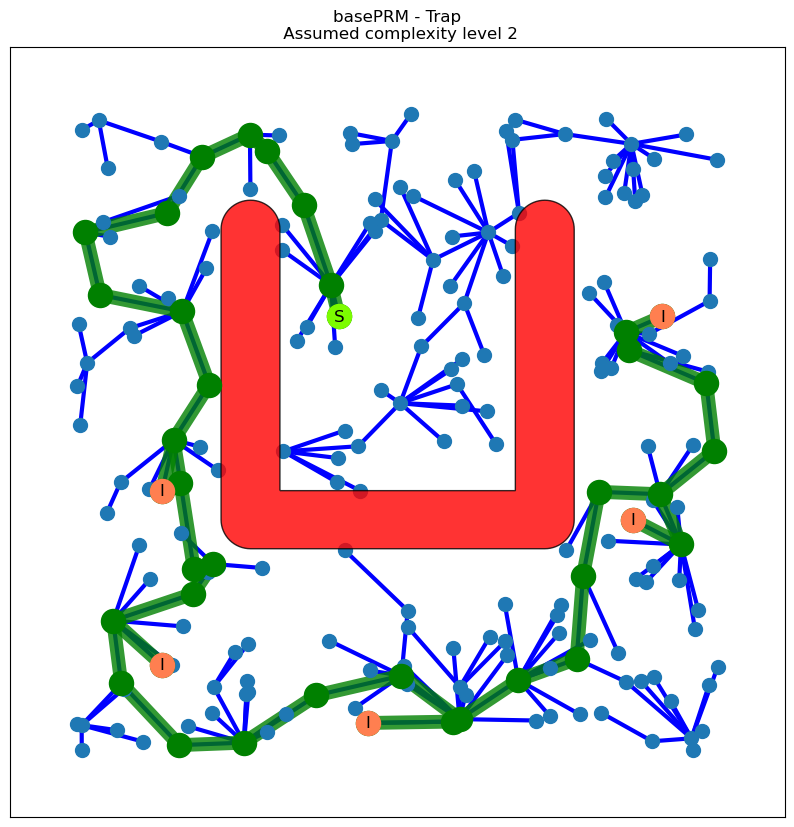

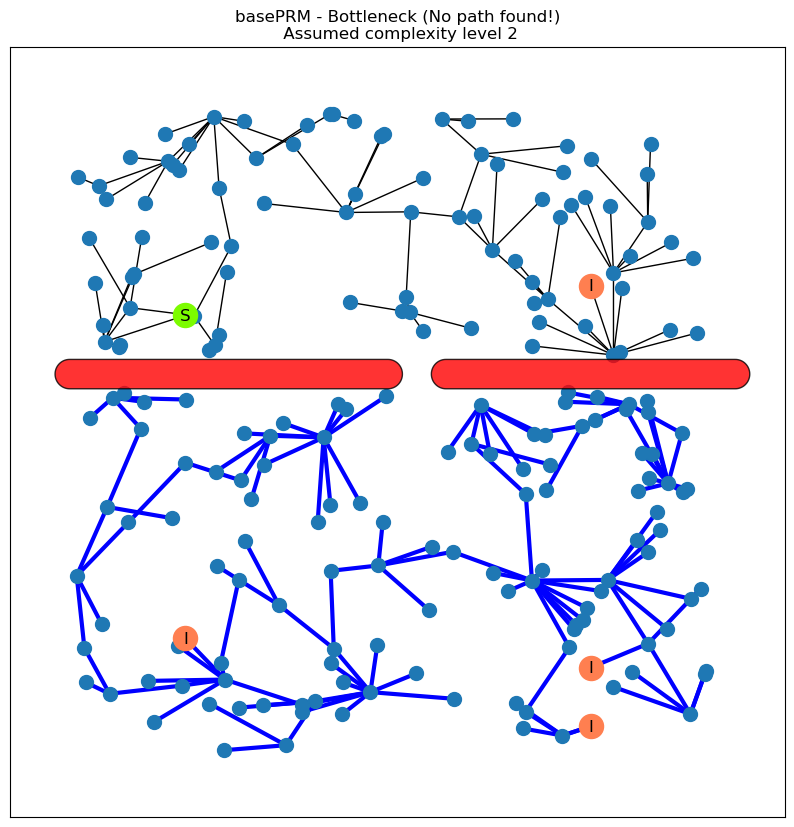

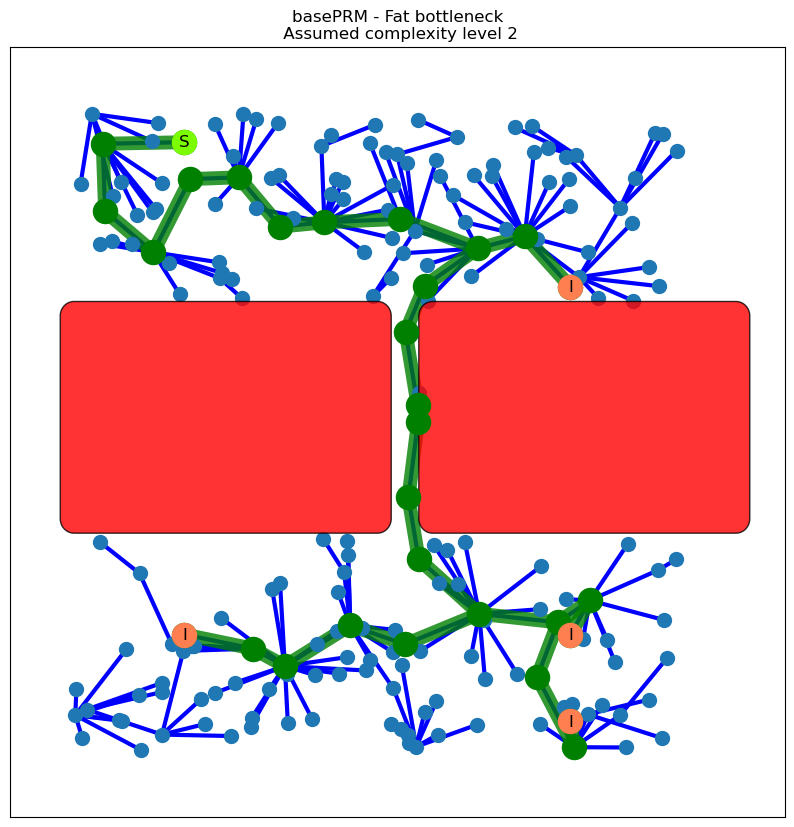

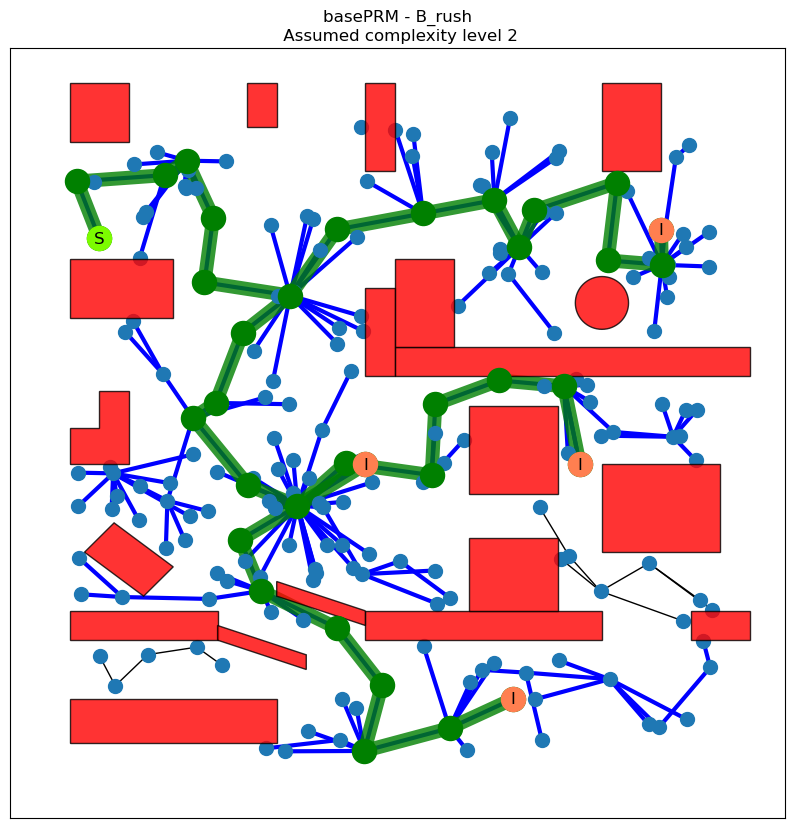

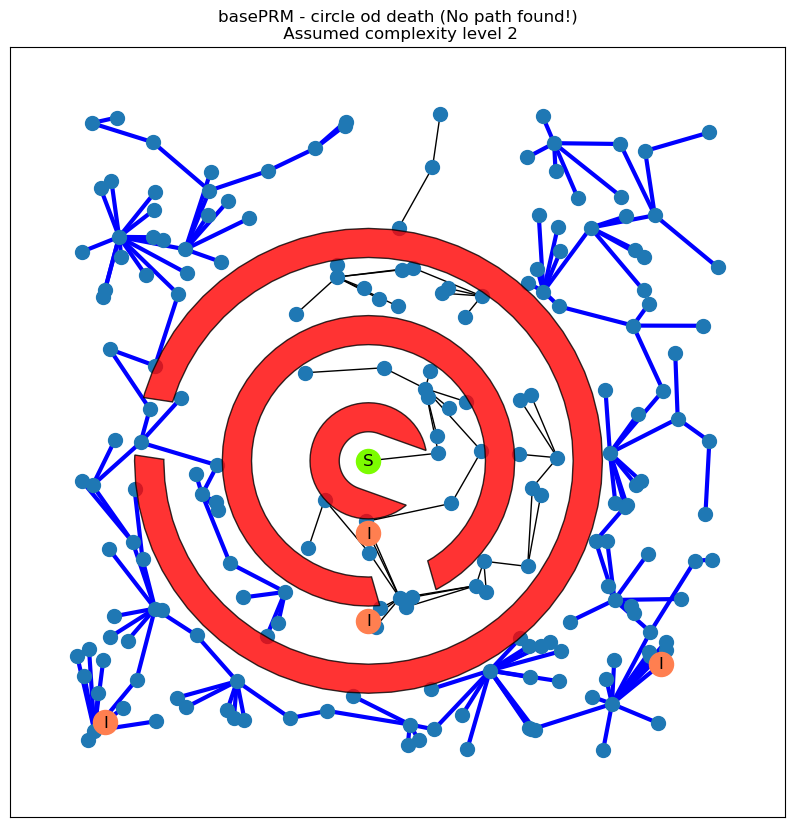

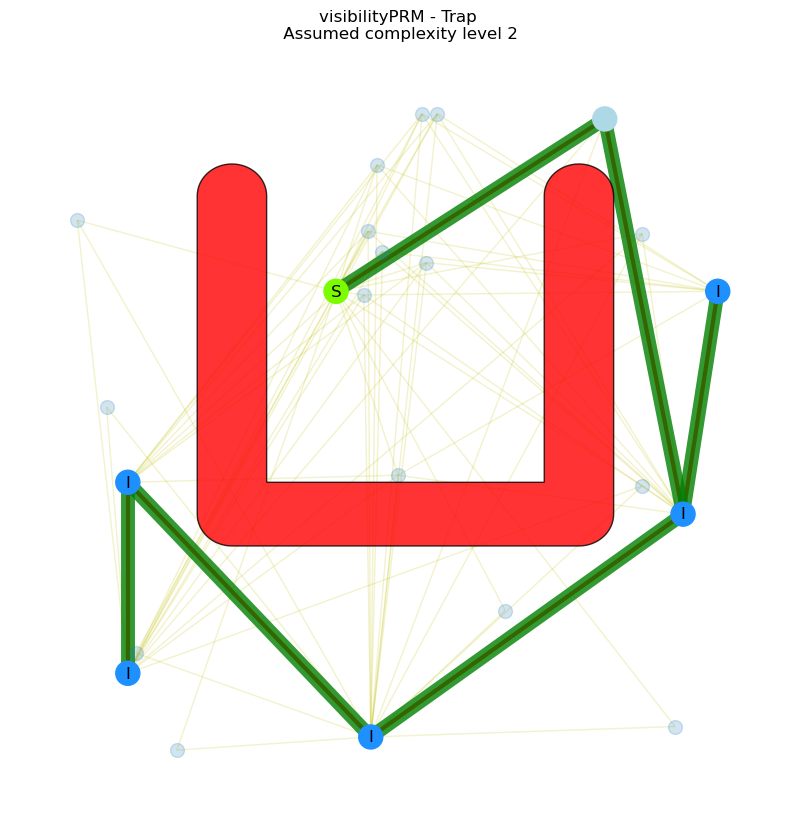

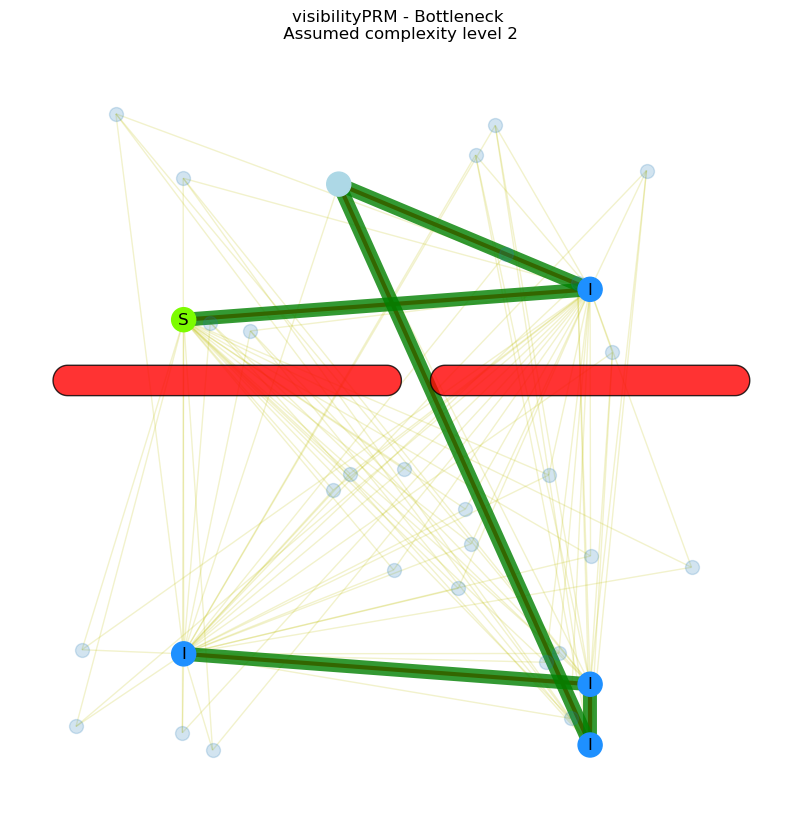

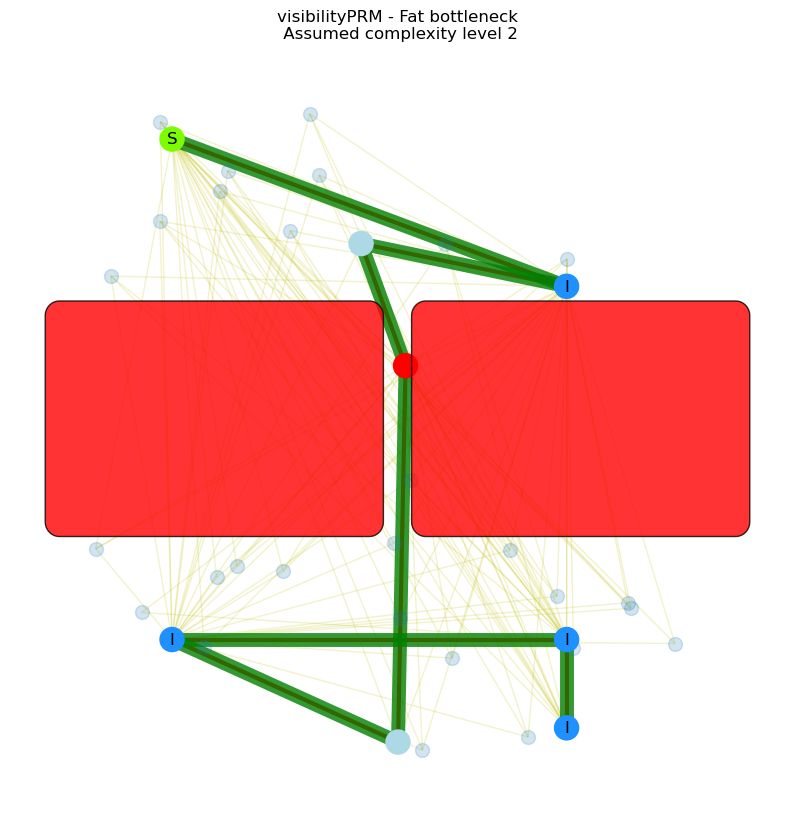

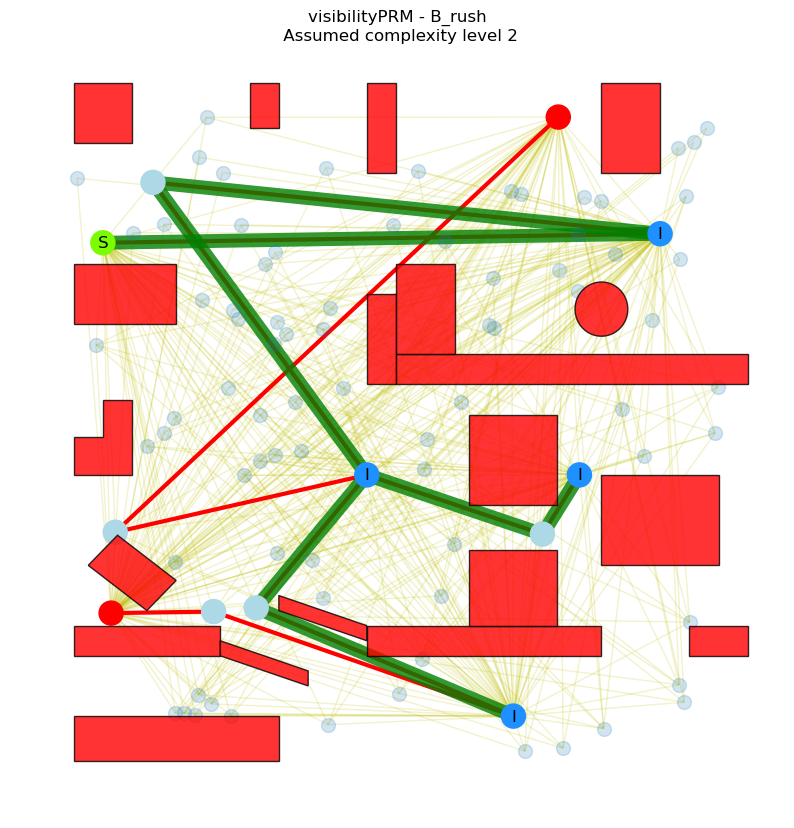

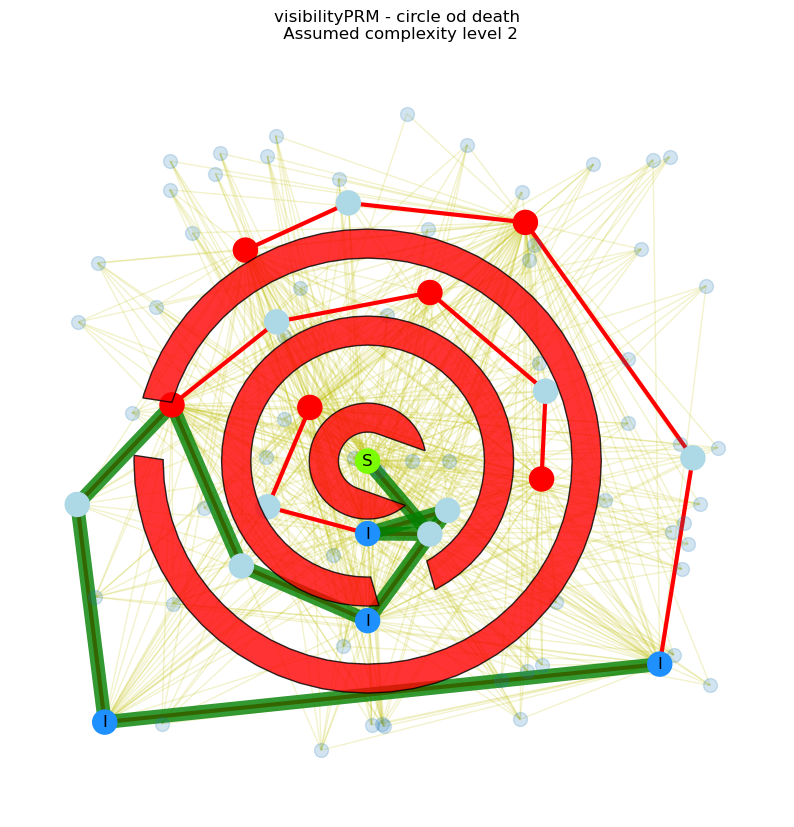

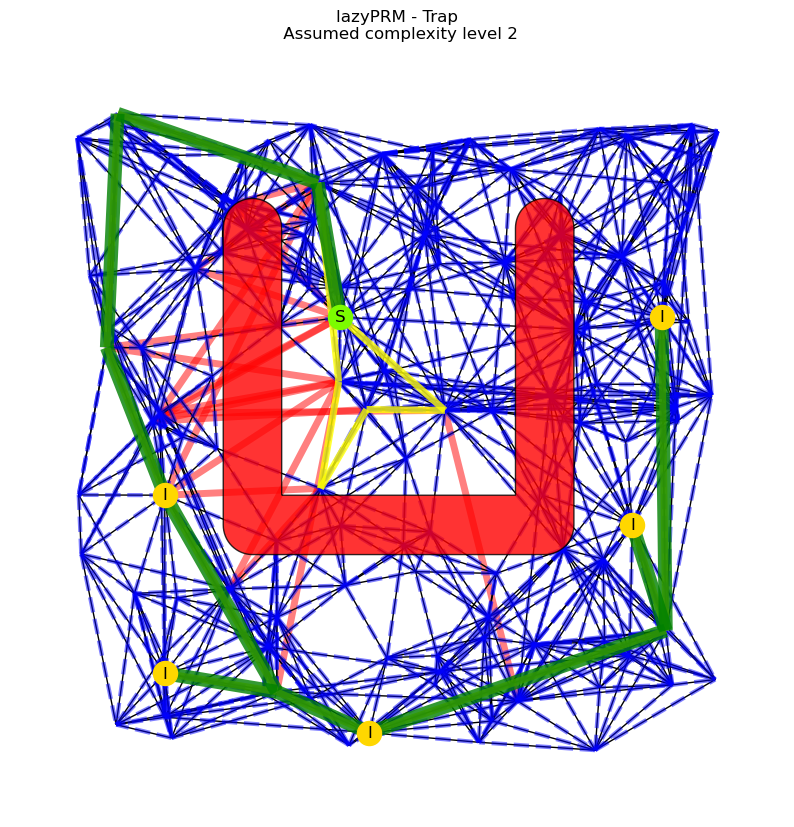

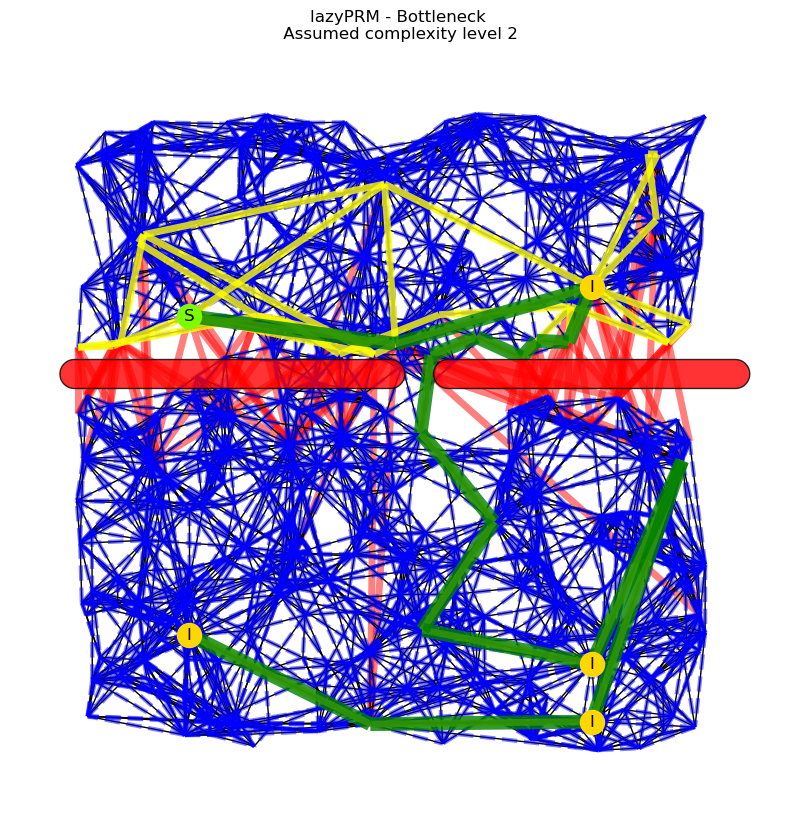

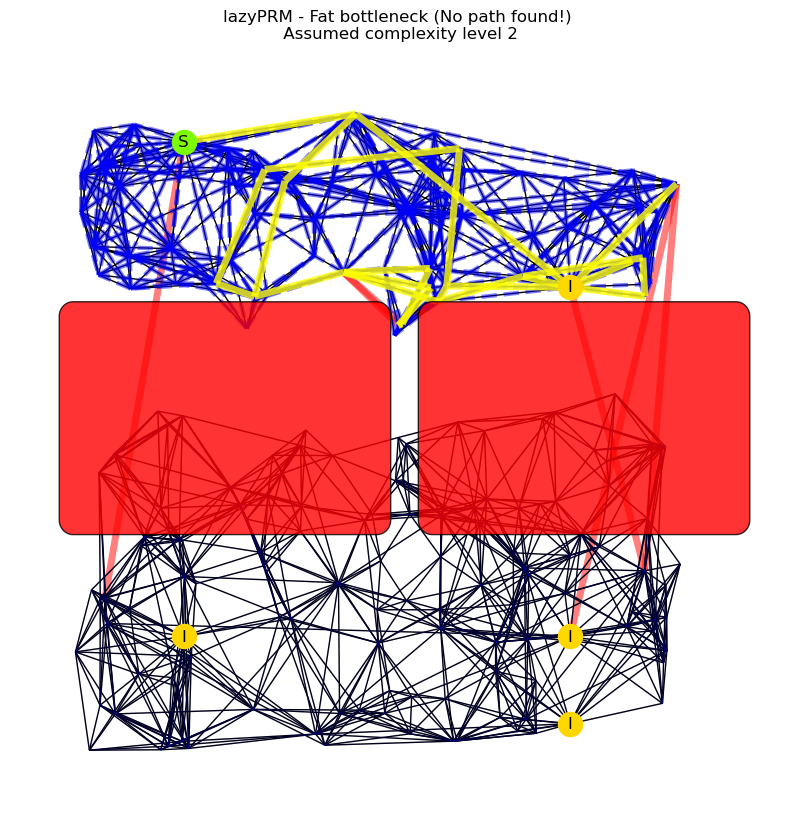

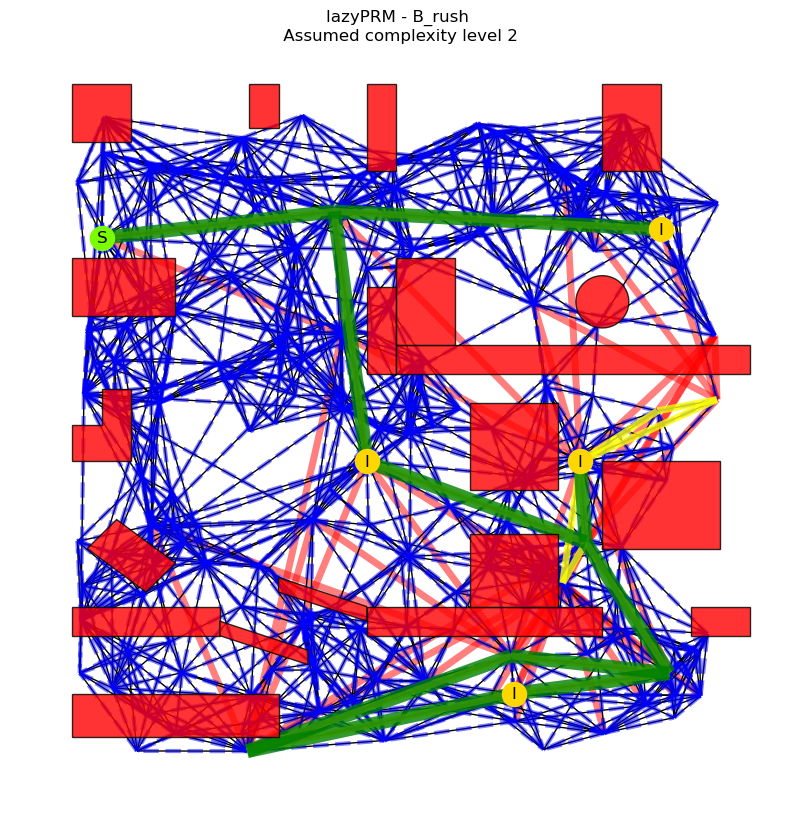

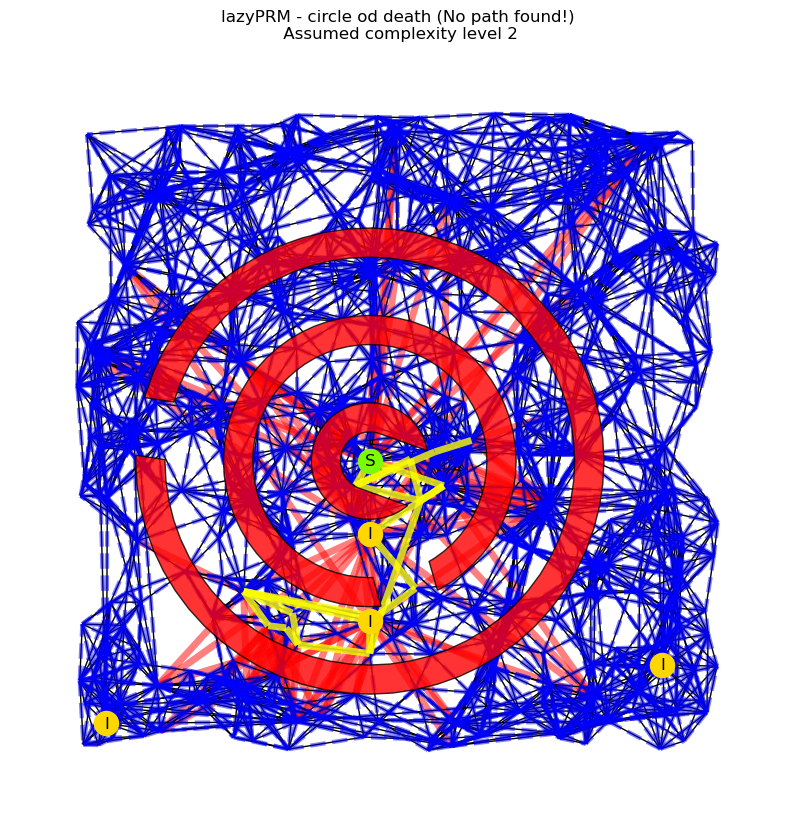

In [9]:
import matplotlib.pyplot as plt

for result in resultList:
    fig_local = plt.figure(figsize=(10,10))
    ax = fig_local.add_subplot(1,1,1)
    title = result.plannerFactoryName + " - " + result.benchmark.name
    if result.solution == []:
        title += " (No path found!)"
    title += "\n Assumed complexity level " + str(result.benchmark.level)
    ax.set_title(title)

    try:
        #IPVISBasicsPRM.basicPRMVisualize(result.planner, result.solution, ax=ax, nodeSize=100))
        plannerFactory[result.plannerFactoryName][2](result.planner, result.solution, ax=ax, nodeSize=100)


    except Exception as e:
        print ("Error")
        print(e)
        pass
    

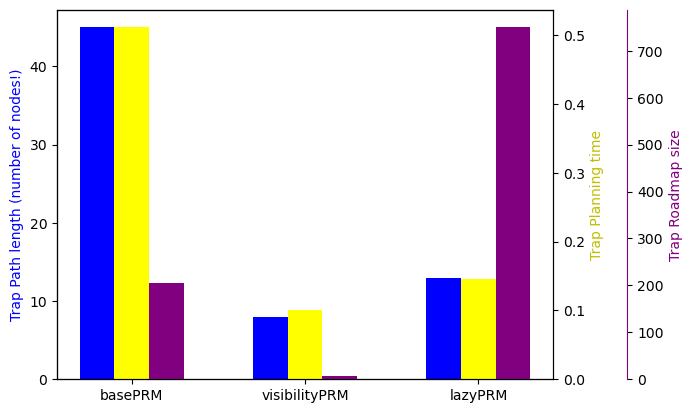

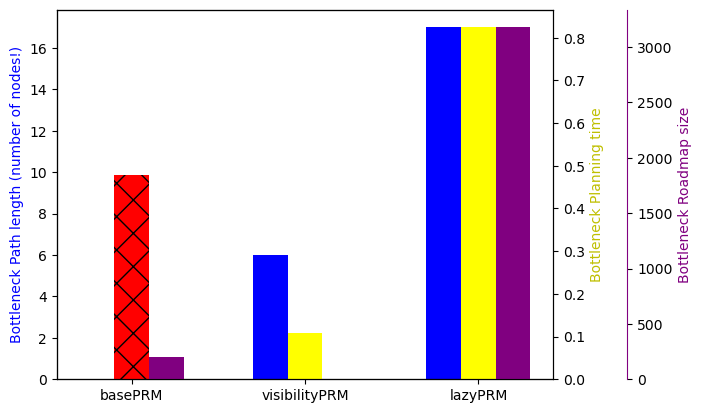

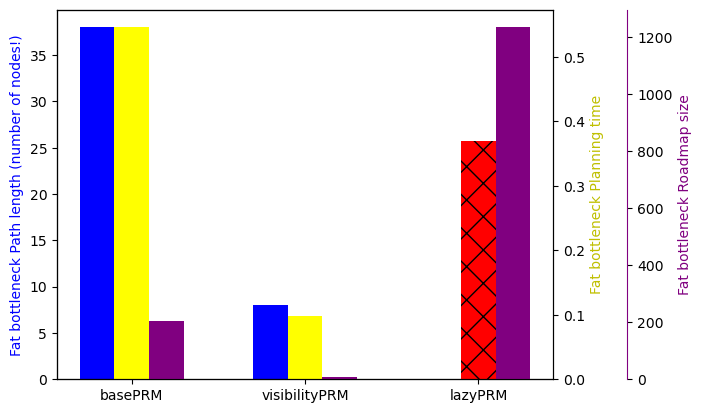

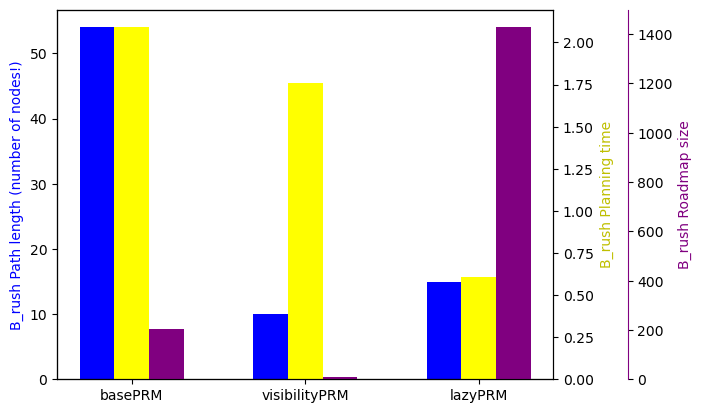

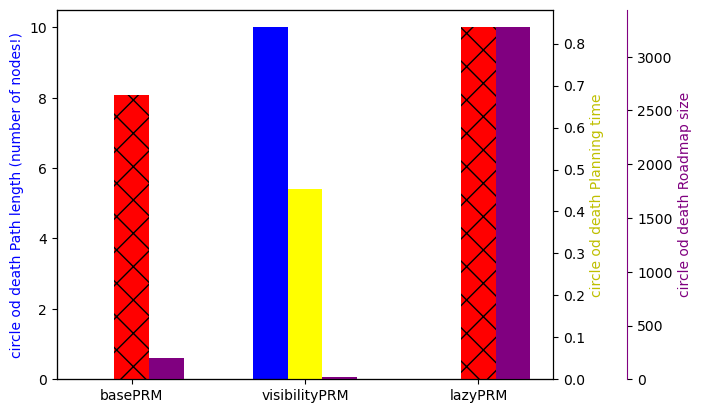

In [10]:
import numpy as np
for bench in testList:
    title = bench.name
    pathLength = dict()
    planningTime = dict()
    roadmapSize  = dict()
    
    try:
        for result in resultList:
            if result.benchmark.name == bench.name:
                #print result.benchmark.name  + " - " +  result.plannerFactoryName, len(result.solution)
                pathLength[result.plannerFactoryName] = len(result.solution)
                planningTime[result.plannerFactoryName] = result.perfDataFrame.groupby(["name"]).sum(numeric_only=True)["time"]["planRoundPath"]
                roadmapSize[result.plannerFactoryName] = result.planner.graph.size()


        fig, ax = plt.subplots()

        width = 0.2

        ax.bar(np.arange(len(pathLength.keys())), pathLength.values(),width, color="blue")
        ax.set_ylabel(title + " Path length (number of nodes!)", color="blue")
        ax.set_xticks(np.arange(len(pathLength.keys())) + width)
        ax.set_xticklabels(pathLength.keys())

        ax2 = ax.twinx()
        bar = ax2.bar(np.arange(len(pathLength.keys()))+width, planningTime.values(),width, color="red")
        ax2.set_ylabel(title + " Planning time", color="y")

        # Add coloring and patterns on axis two
        hatches = ['x' if length==0 else '' for length in pathLength.values()]
        color   = ['red' if length==0 else 'yellow' for length in pathLength.values()]
        for i,thisbar in enumerate(bar.patches):
            thisbar.set_facecolor(color[i])
            thisbar.set_hatch(hatches[i])

        # Multiple axes 
        ax3 = ax.twinx()
        ax3.bar(np.arange(len(pathLength.keys()))+2*width, roadmapSize.values(),width, color="purple")
        ax3.set_ylabel(title + " Roadmap size",  color="purple")
        ax3.spines['right'].set_position(('axes', 1.15))
        ax3.spines['right'].set_color("purple")
    except:
        pass


    
        
    

result.perfDataFrame.groupby(["name"]).sum()

In [11]:
result.perfDataFrame.groupby(["name"]).sum(numeric_only=True)

time
name                                 
_buildRoadmap                0.274822
_checkForCollisionAndUpdate  0.329506
_nearestInterim              0.003214
lineInCollision              0.264606
planRoundPath                0.839079
pointInCollision             0.283179

In [12]:
resultBasic = resultList[:5]
resultVisibility = resultList[5:10]
resultLazy = resultList[10:]

In [13]:
'''
import pandas as pd

result_frames = []

for i in range(len(resultBasic)):
    sum_time_Basic = resultBasic[i].perfDataFrame.groupby(["name"]).sum(numeric_only=True).sum()["time"]
    sum_time_Visibilty = resultVisibility[i].perfDataFrame.groupby(["name"]).sum(numeric_only=True).sum()["time"]
    sum_time_Lazy = resultLazy[i].perfDataFrame.groupby(["name"]).sum(numeric_only=True).sum()["time"]

    
    # DataFrame erstellen
    data = {
        "Zeit Basic": [sum_time_Basic],
        "Zeit Visibility": [sum_time_Visibilty],
        "Zeit LazyPRM" : [sum_time_Lazy]
    }

    df = pd.DataFrame(data)

    # DataFrame zur Liste hinzufügen
    result_frames.append(df)

final_df = pd.concat(result_frames, ignore_index=True)

# DataFrame in eine Excel-Datei schreiben
final_df.to_excel("Auswertung_alle_3PRMs_.xlsx", index=False)

'''


'\nimport pandas as pd\n\nresult_frames = []\n\nfor i in range(len(resultBasic)):\n    sum_time_Basic = resultBasic[i].perfDataFrame.groupby(["name"]).sum(numeric_only=True).sum()["time"]\n    sum_time_Visibilty = resultVisibility[i].perfDataFrame.groupby(["name"]).sum(numeric_only=True).sum()["time"]\n    sum_time_Lazy = resultLazy[i].perfDataFrame.groupby(["name"]).sum(numeric_only=True).sum()["time"]\n\n    \n    # DataFrame erstellen\n    data = {\n        "Zeit Basic": [sum_time_Basic],\n        "Zeit Visibility": [sum_time_Visibilty],\n        "Zeit LazyPRM" : [sum_time_Lazy]\n    }\n\n    df = pd.DataFrame(data)\n\n    # DataFrame zur Liste hinzufügen\n    result_frames.append(df)\n\nfinal_df = pd.concat(result_frames, ignore_index=True)\n\n# DataFrame in eine Excel-Datei schreiben\nfinal_df.to_excel("Auswertung_alle_3PRMs_.xlsx", index=False)\n\n'

In [14]:
for i in range(len(resultBasic)):
    print(resultBasic[i].perfDataFrame.groupby(["name"]).sum(numeric_only=True).sum()["time"])


1.5206232070922852
1.6354331970214844
1.7080750465393066
7.796149253845215
2.388462543487549


In [15]:
for i in range(len(resultVisibility)):

    print(resultVisibility[i].perfDataFrame.groupby(["name"]).sum(numeric_only=True).sum())


time    0.345909
dtype: float64
time    0.386875
dtype: float64
time    0.343461
dtype: float64
time    6.916177
dtype: float64
time    1.711103
dtype: float64


In [16]:
for i in range(len(resultLazy)):

    print(resultLazy[i].perfDataFrame.groupby(["name"]).sum(numeric_only=True).sum())


time    0.295436
dtype: float64
time    1.763052
dtype: float64
time    0.739509
dtype: float64
time    1.903592
dtype: float64
time    1.994406
dtype: float64


In [17]:
#result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"][result.perfDataFrame["retVal"]==False]["time"].sum(numeric_only=True)

In [18]:
#result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"]["time"]

In [19]:
#result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"][result.perfDataFrame["retVal"]==False]["time"].sum(numeric_only=True)